In [1]:
%matplotlib inline
from util.rasterio_util import add_padding,project_and_merge,project_boundingbox
from util.visualization_util import show
from util.preprocessing_util import preprocess
import numpy as np
import cv2


In [2]:
def display(filename,title,width,figsize=(5,5)):
    im = cv2.imread(filename,-1)
    im = preprocess(im)
    show(im,title,width,figsize)
    return


# Reference Images (B04 in EPSG 32646) and image to be registered (B04 in EPSG 32645)

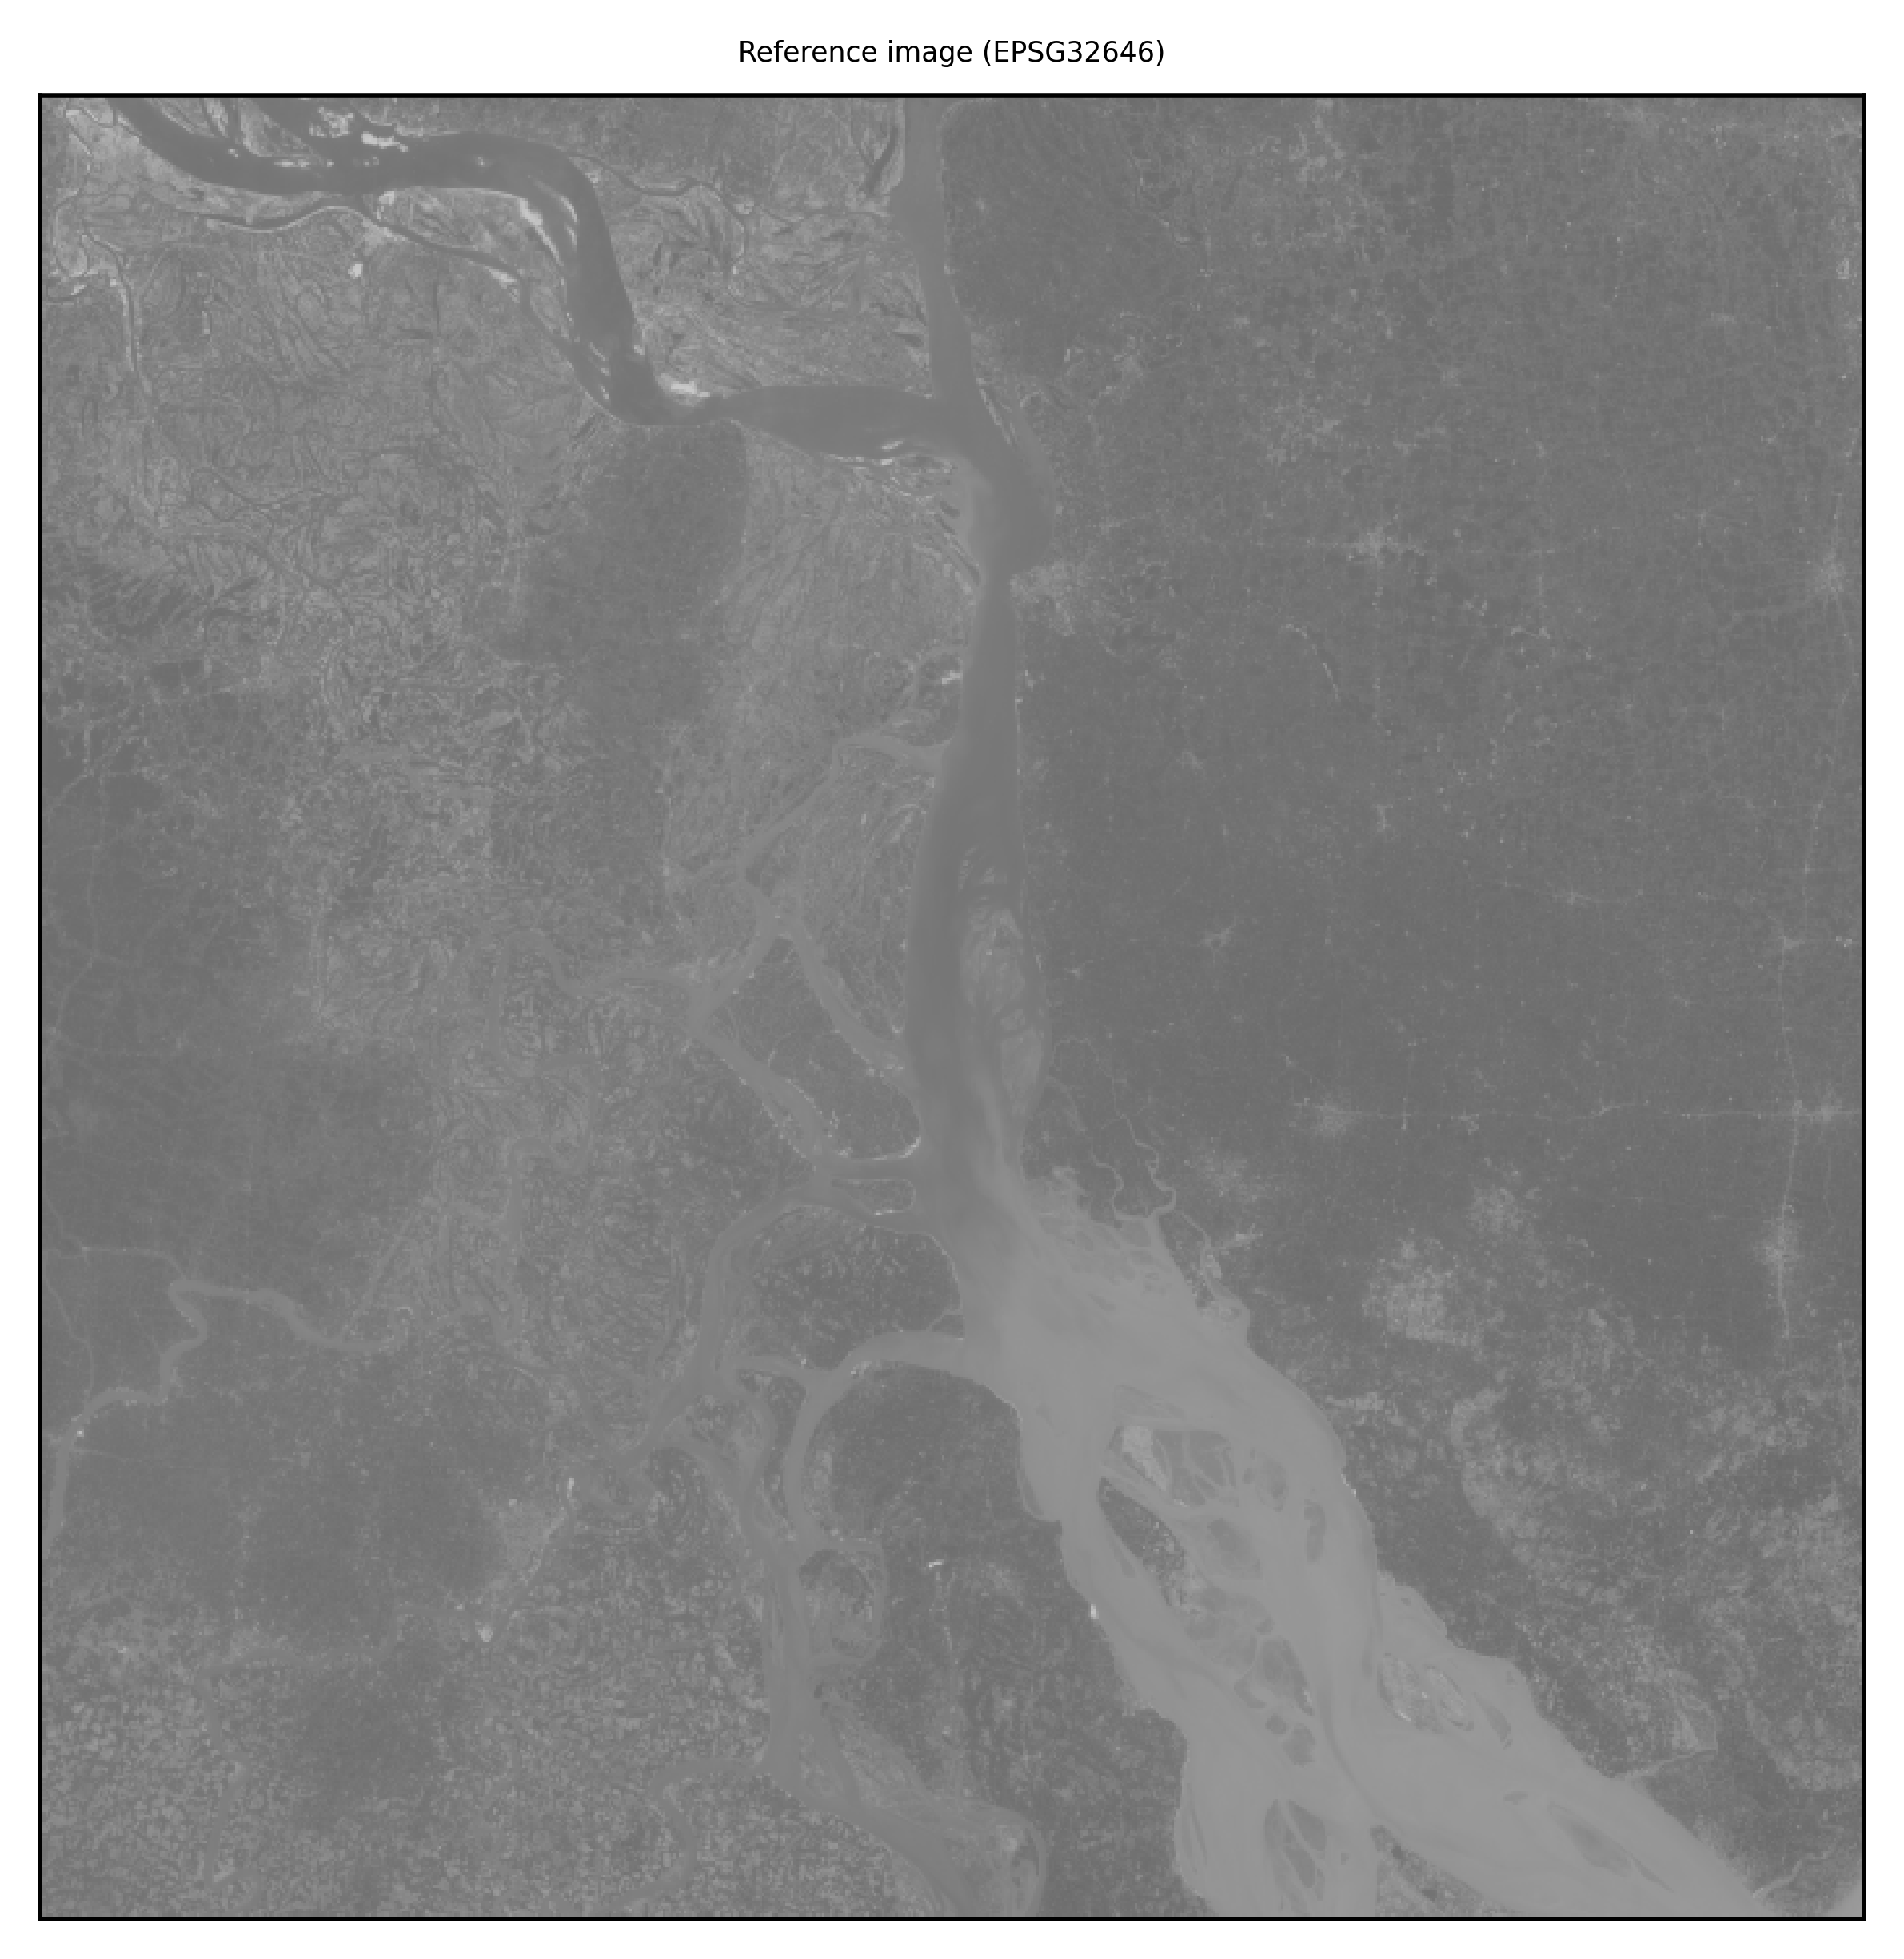

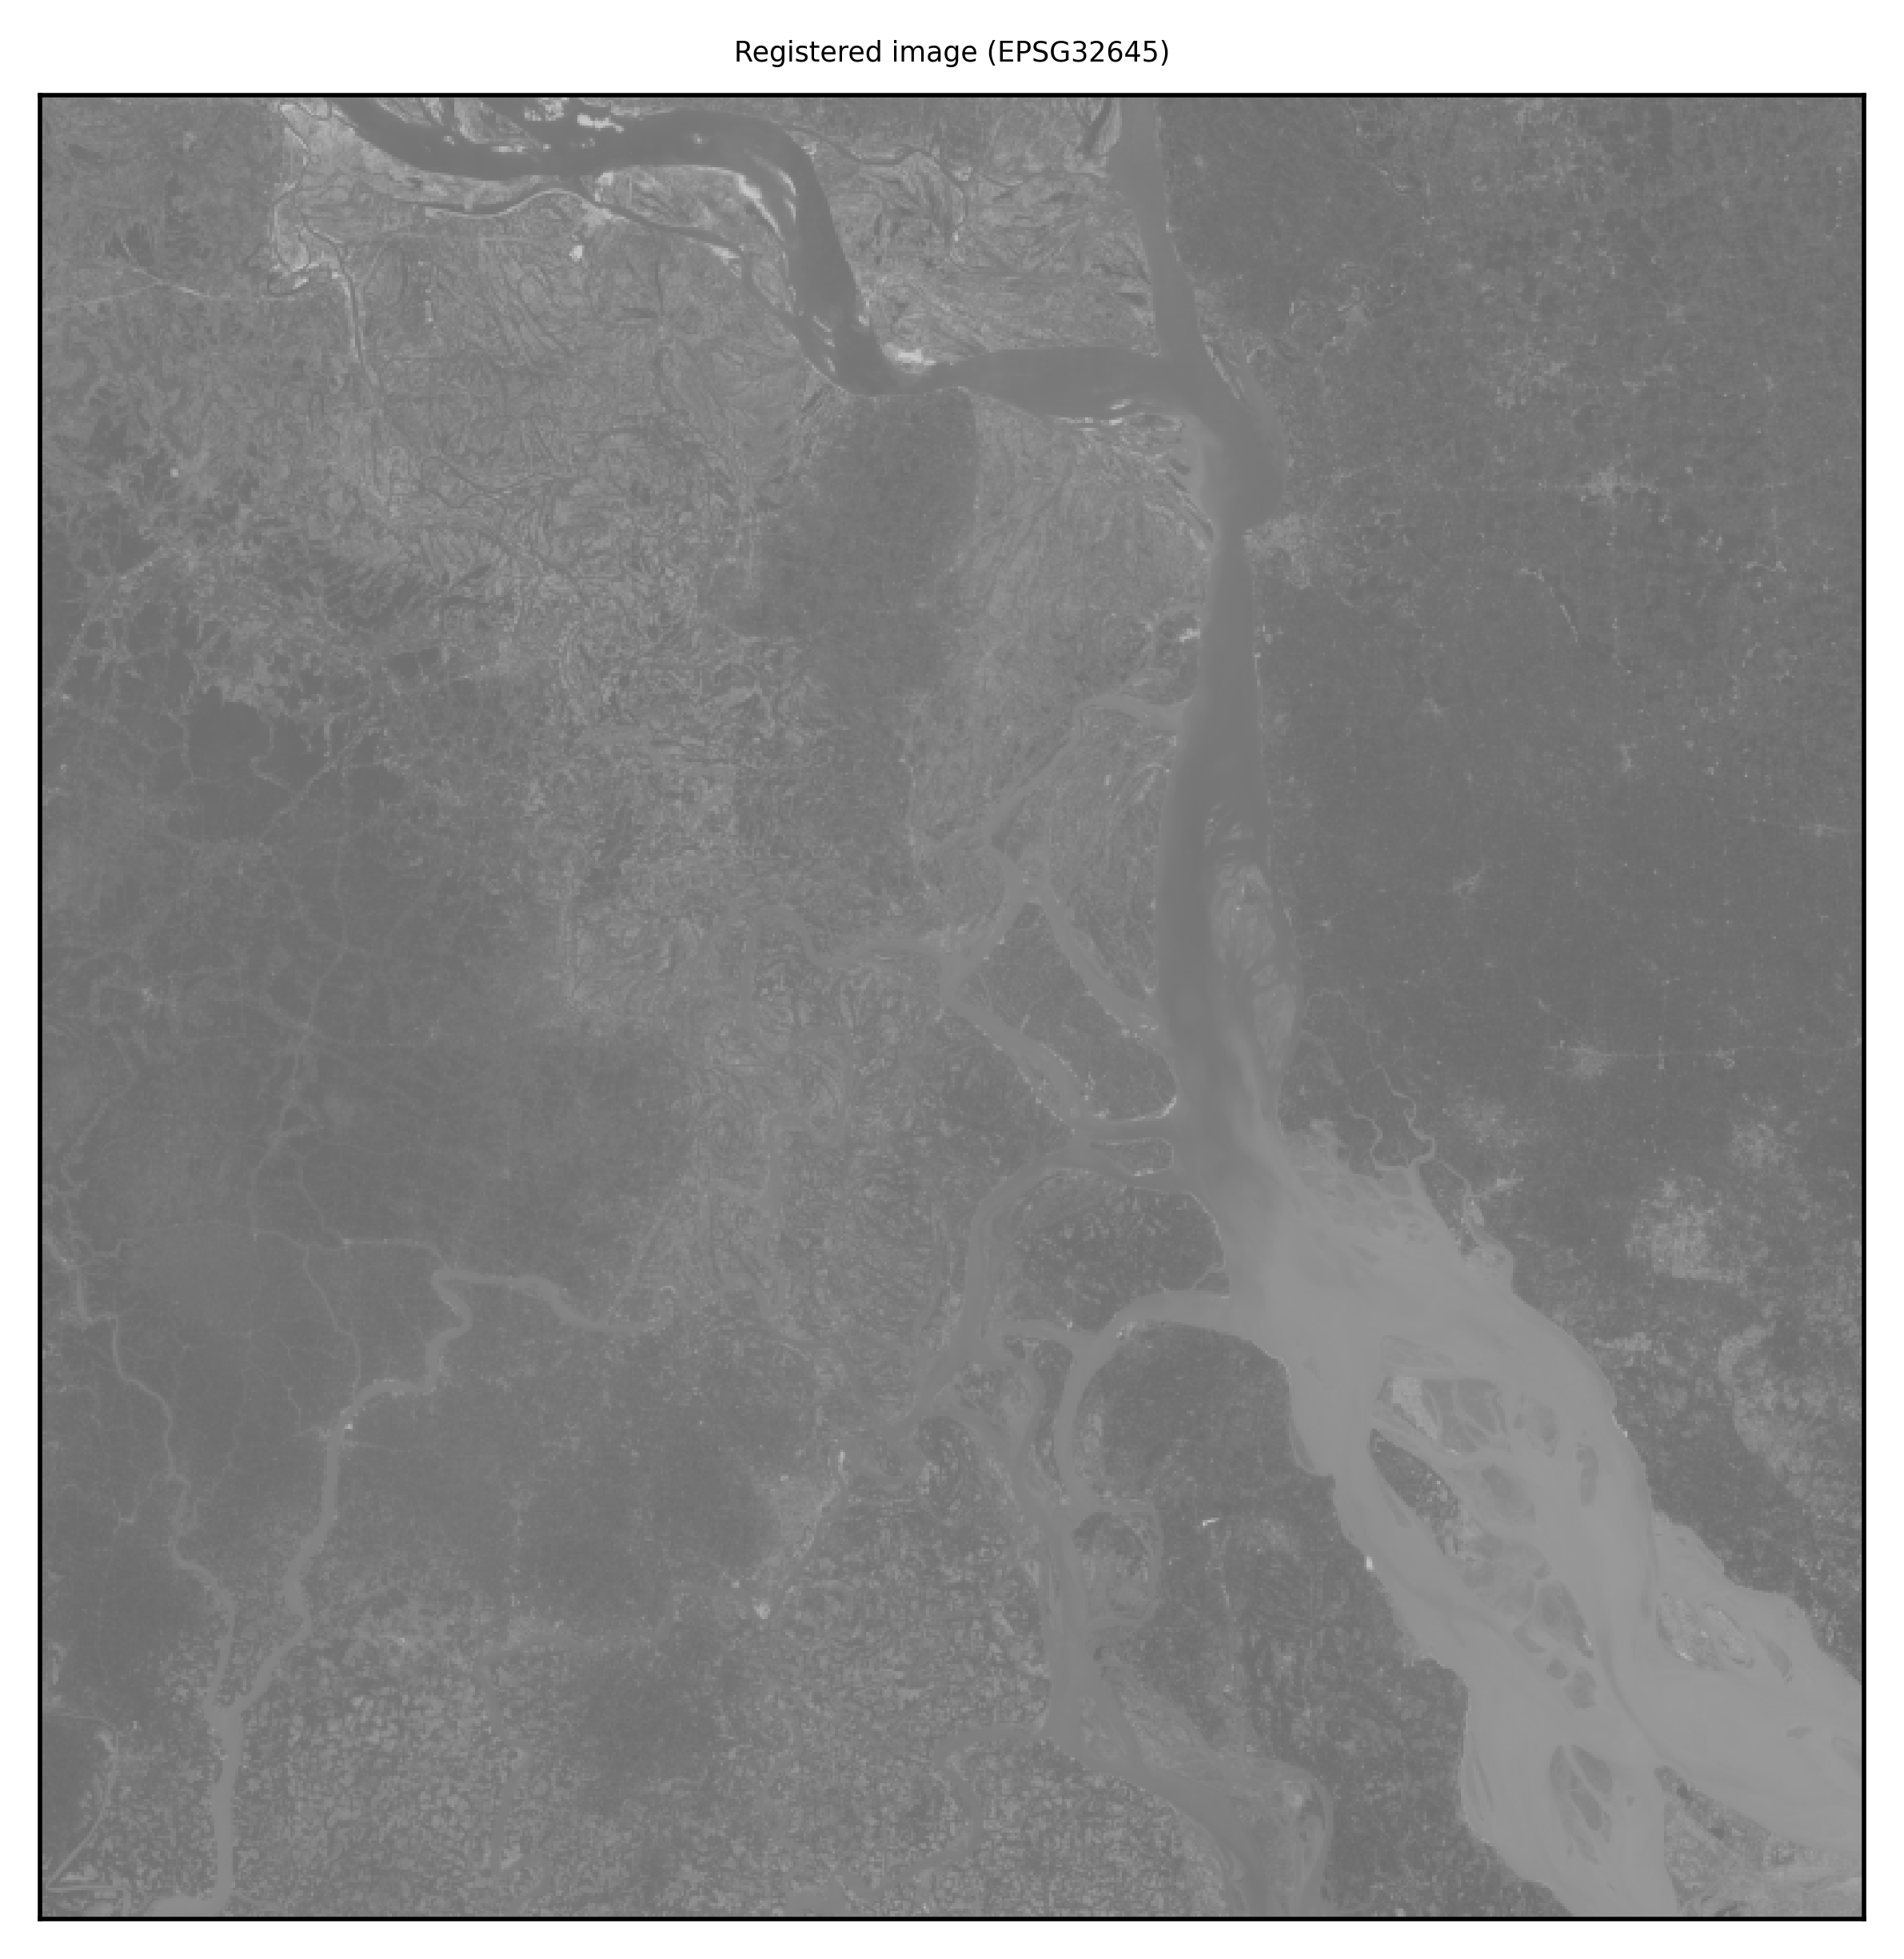

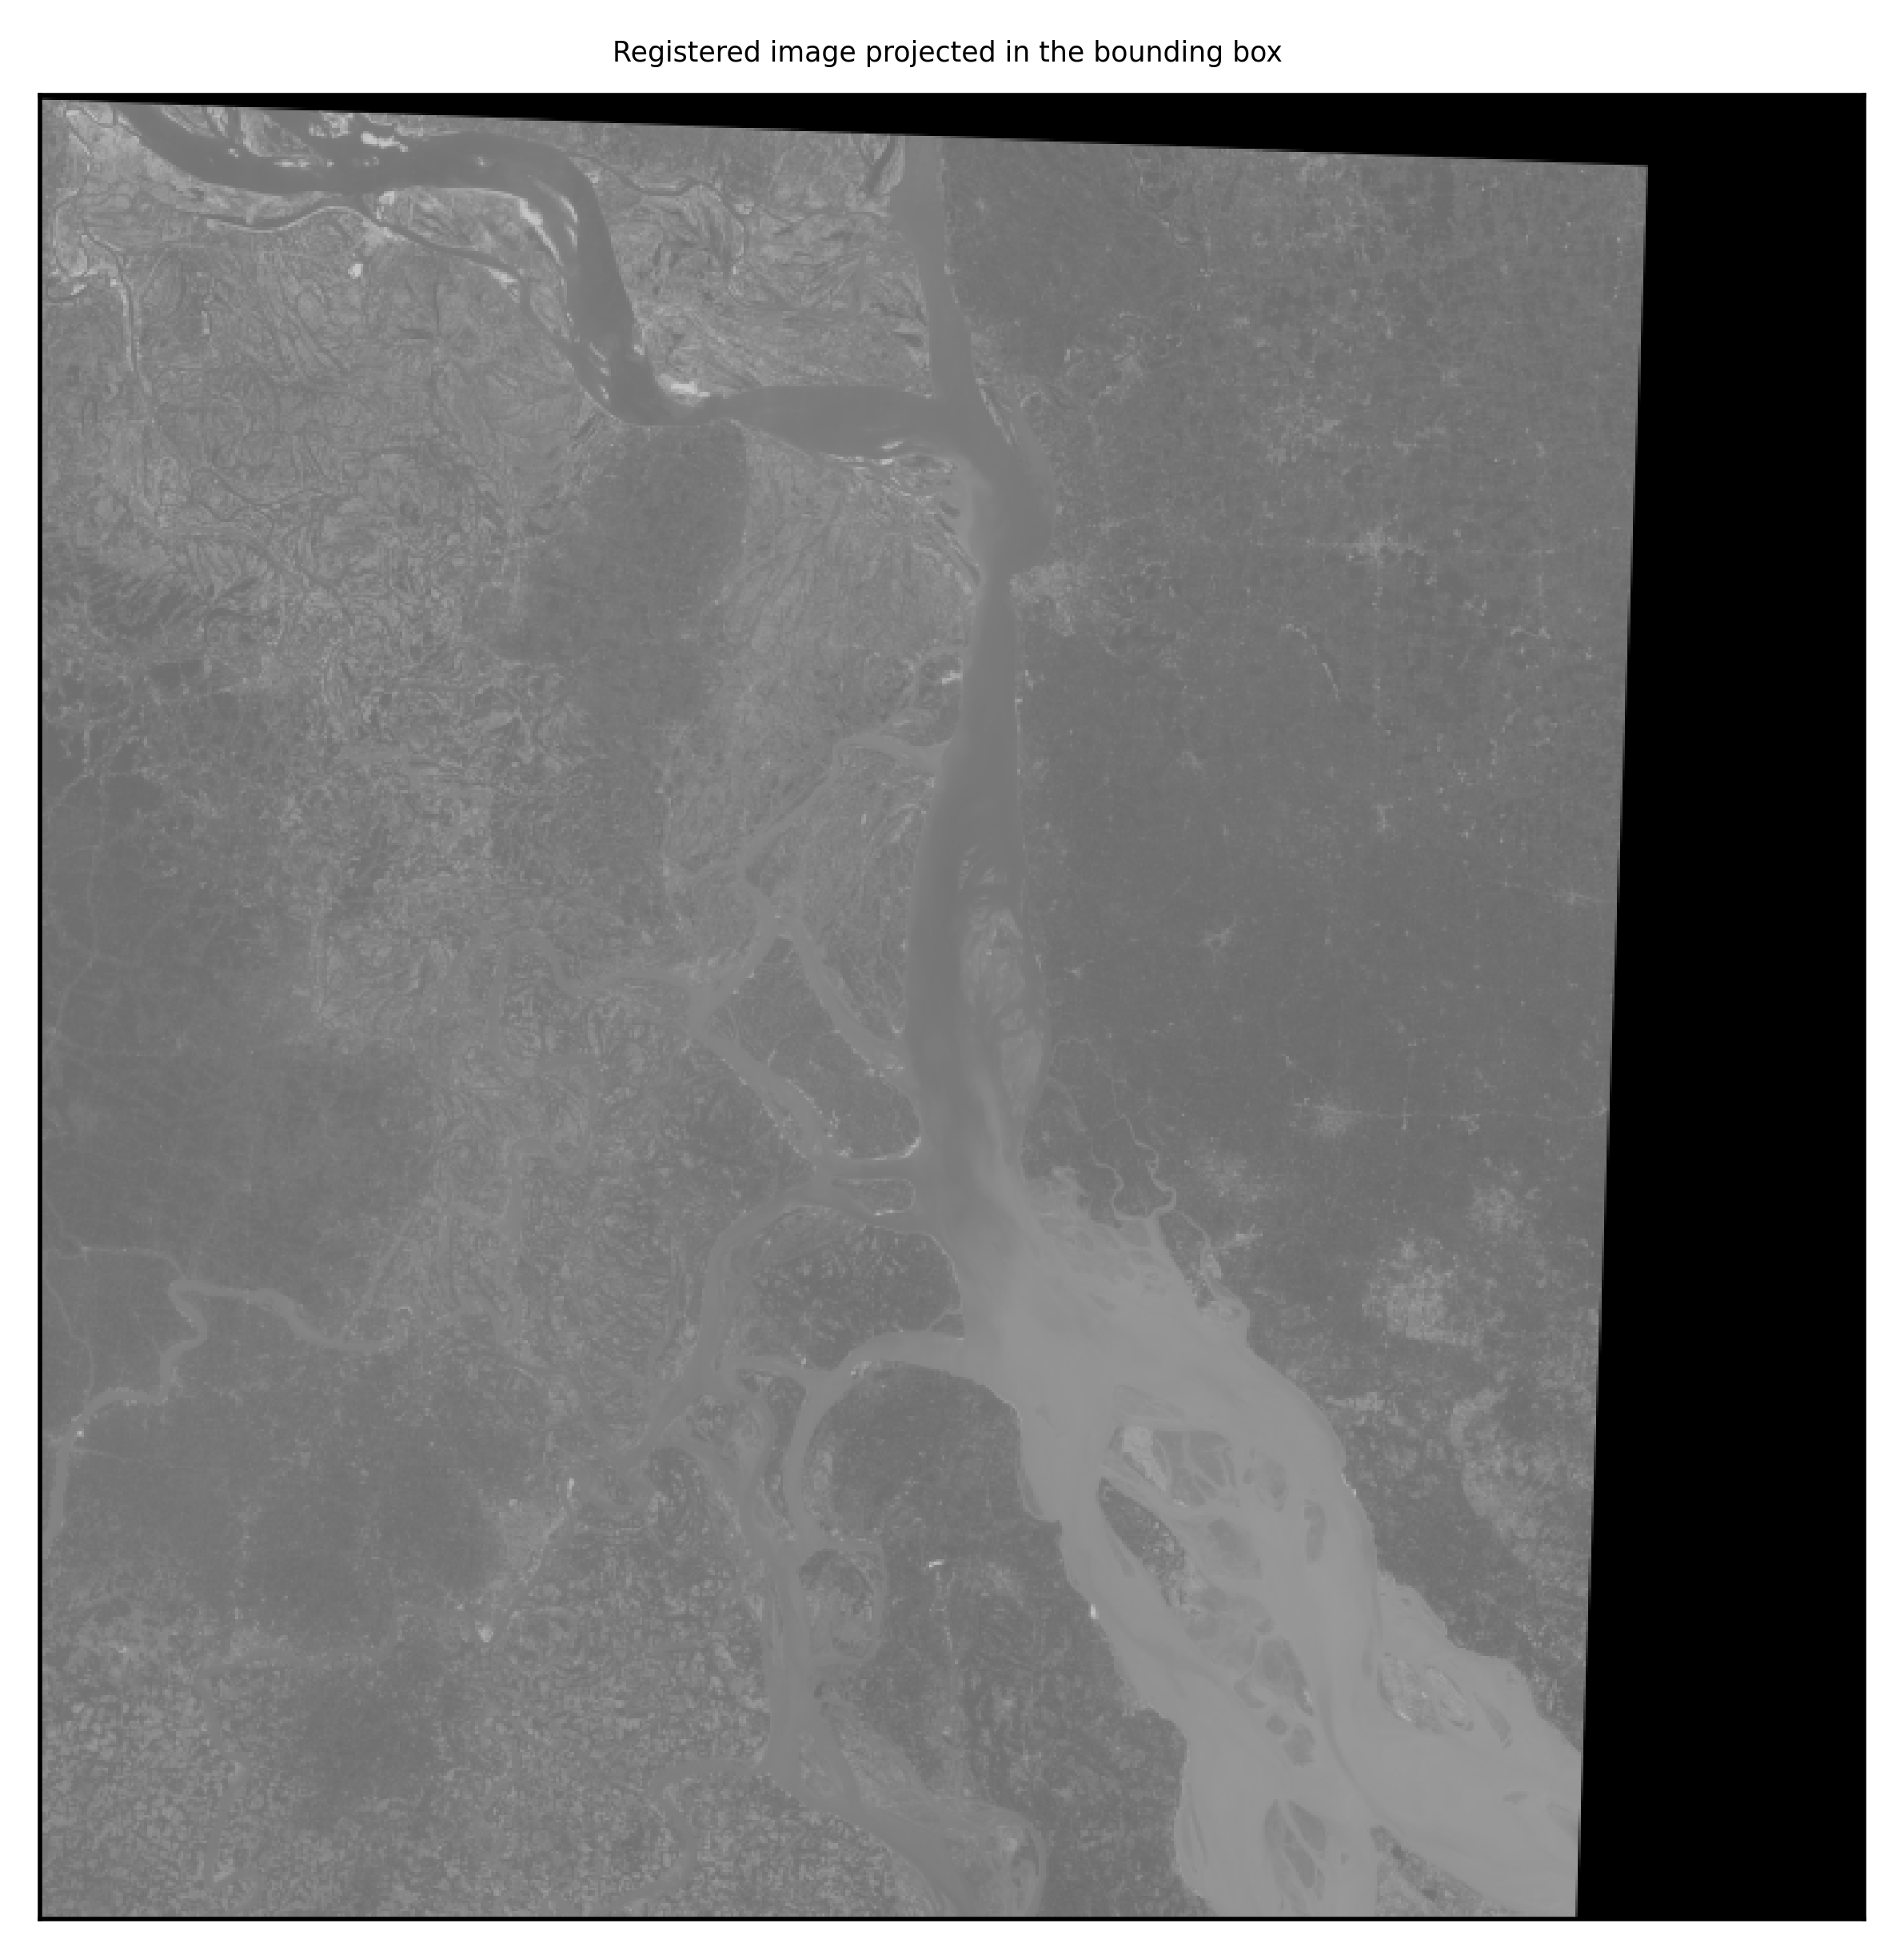

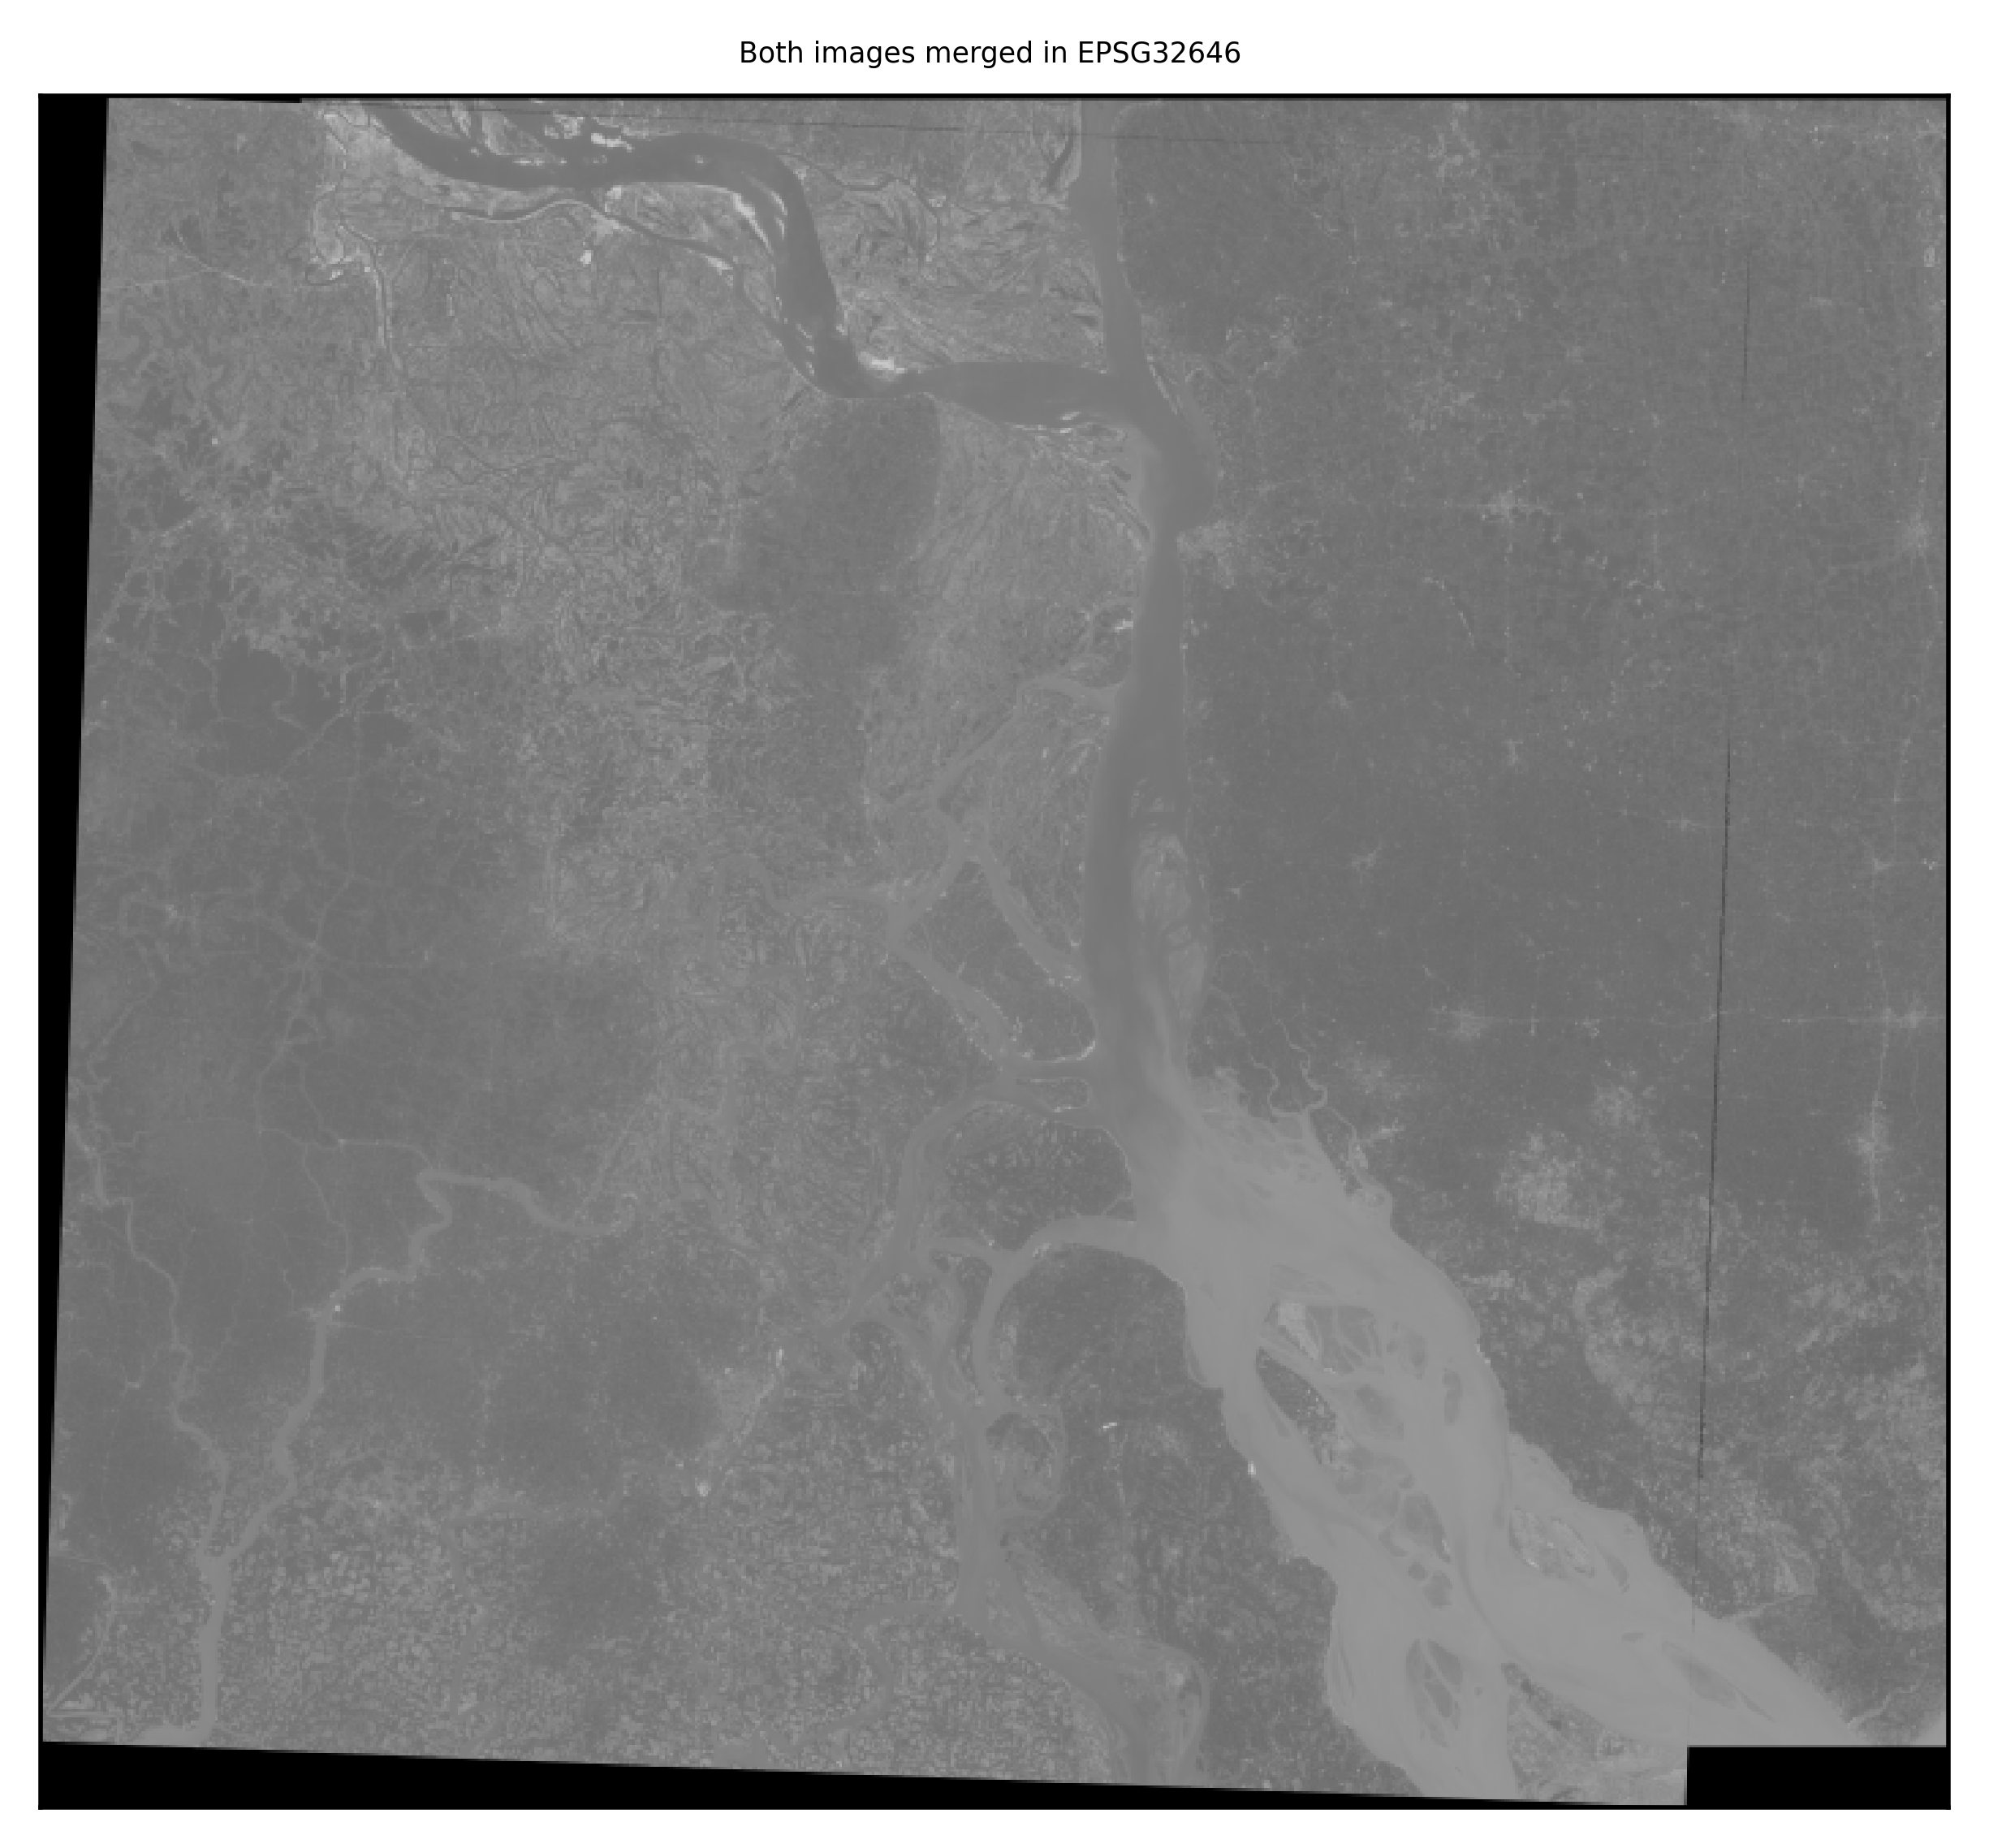

In [3]:
ref_path = "src\S2A_MSIL1C_20230312T042701_N0509_R133_T46QBL_20230312T062152.SAFE\GRANULE\L1C_T46QBL_A040313_20230312T043803\IMG_DATA\T46QBL_20230312T042701_B04.jp2"
reg_path = "src\S2A_MSIL1C_20230312T042701_N0509_R133_T45QZF_20230312T062152.SAFE\GRANULE\L1C_T45QZF_A040313_20230312T043803\IMG_DATA\T45QZF_20230312T042701_B04.jp2"

display(ref_path,'Reference image (EPSG32646)' ,width=700)
display(reg_path,'Registered image (EPSG32645)',width=700)


# project reg_path to the bounding box of ref_path
project_boundingbox(reg_path,ref_path,'img\warp.jp2')
display('img\warp.jp2','Registered image projected in the bounding box ',width=700)

# merge those 2 images toghether
project_and_merge(reg_path,ref_path,'img\merge.jp2')
display('img\merge.jp2','Both images merged in EPSG32646 ',width=700)

Add padding (30px, 1000px) without modifying transform

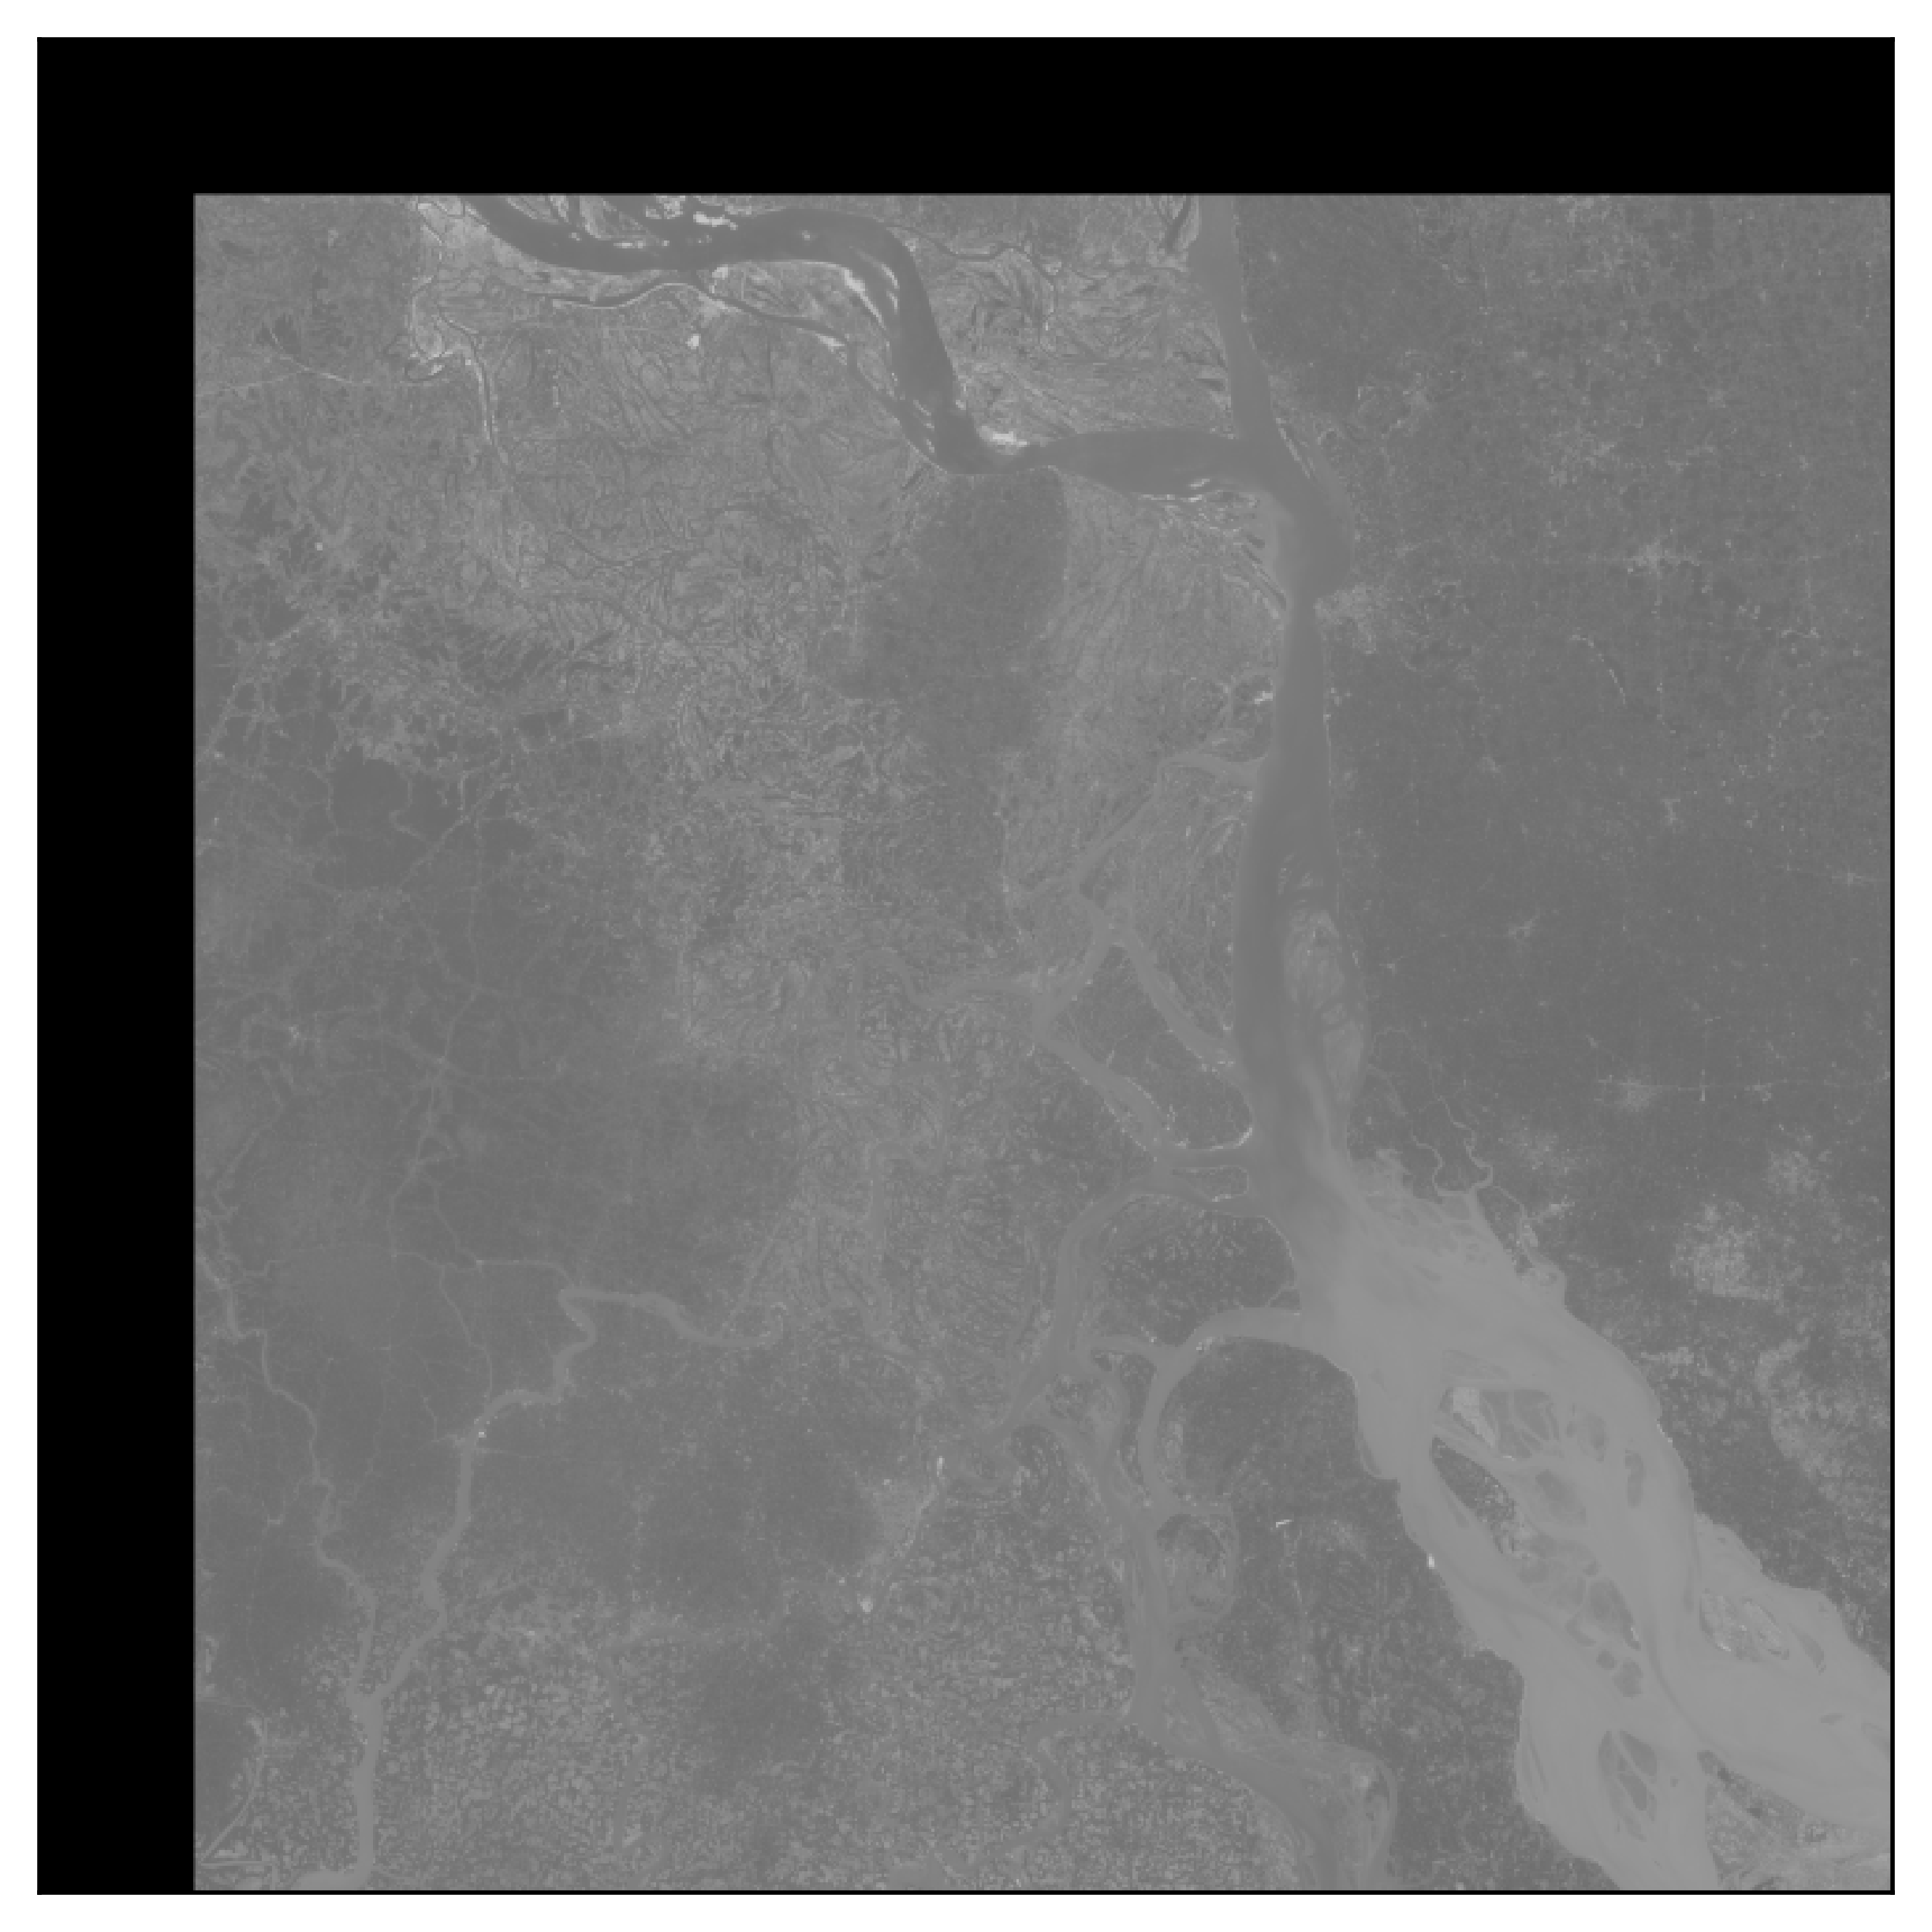

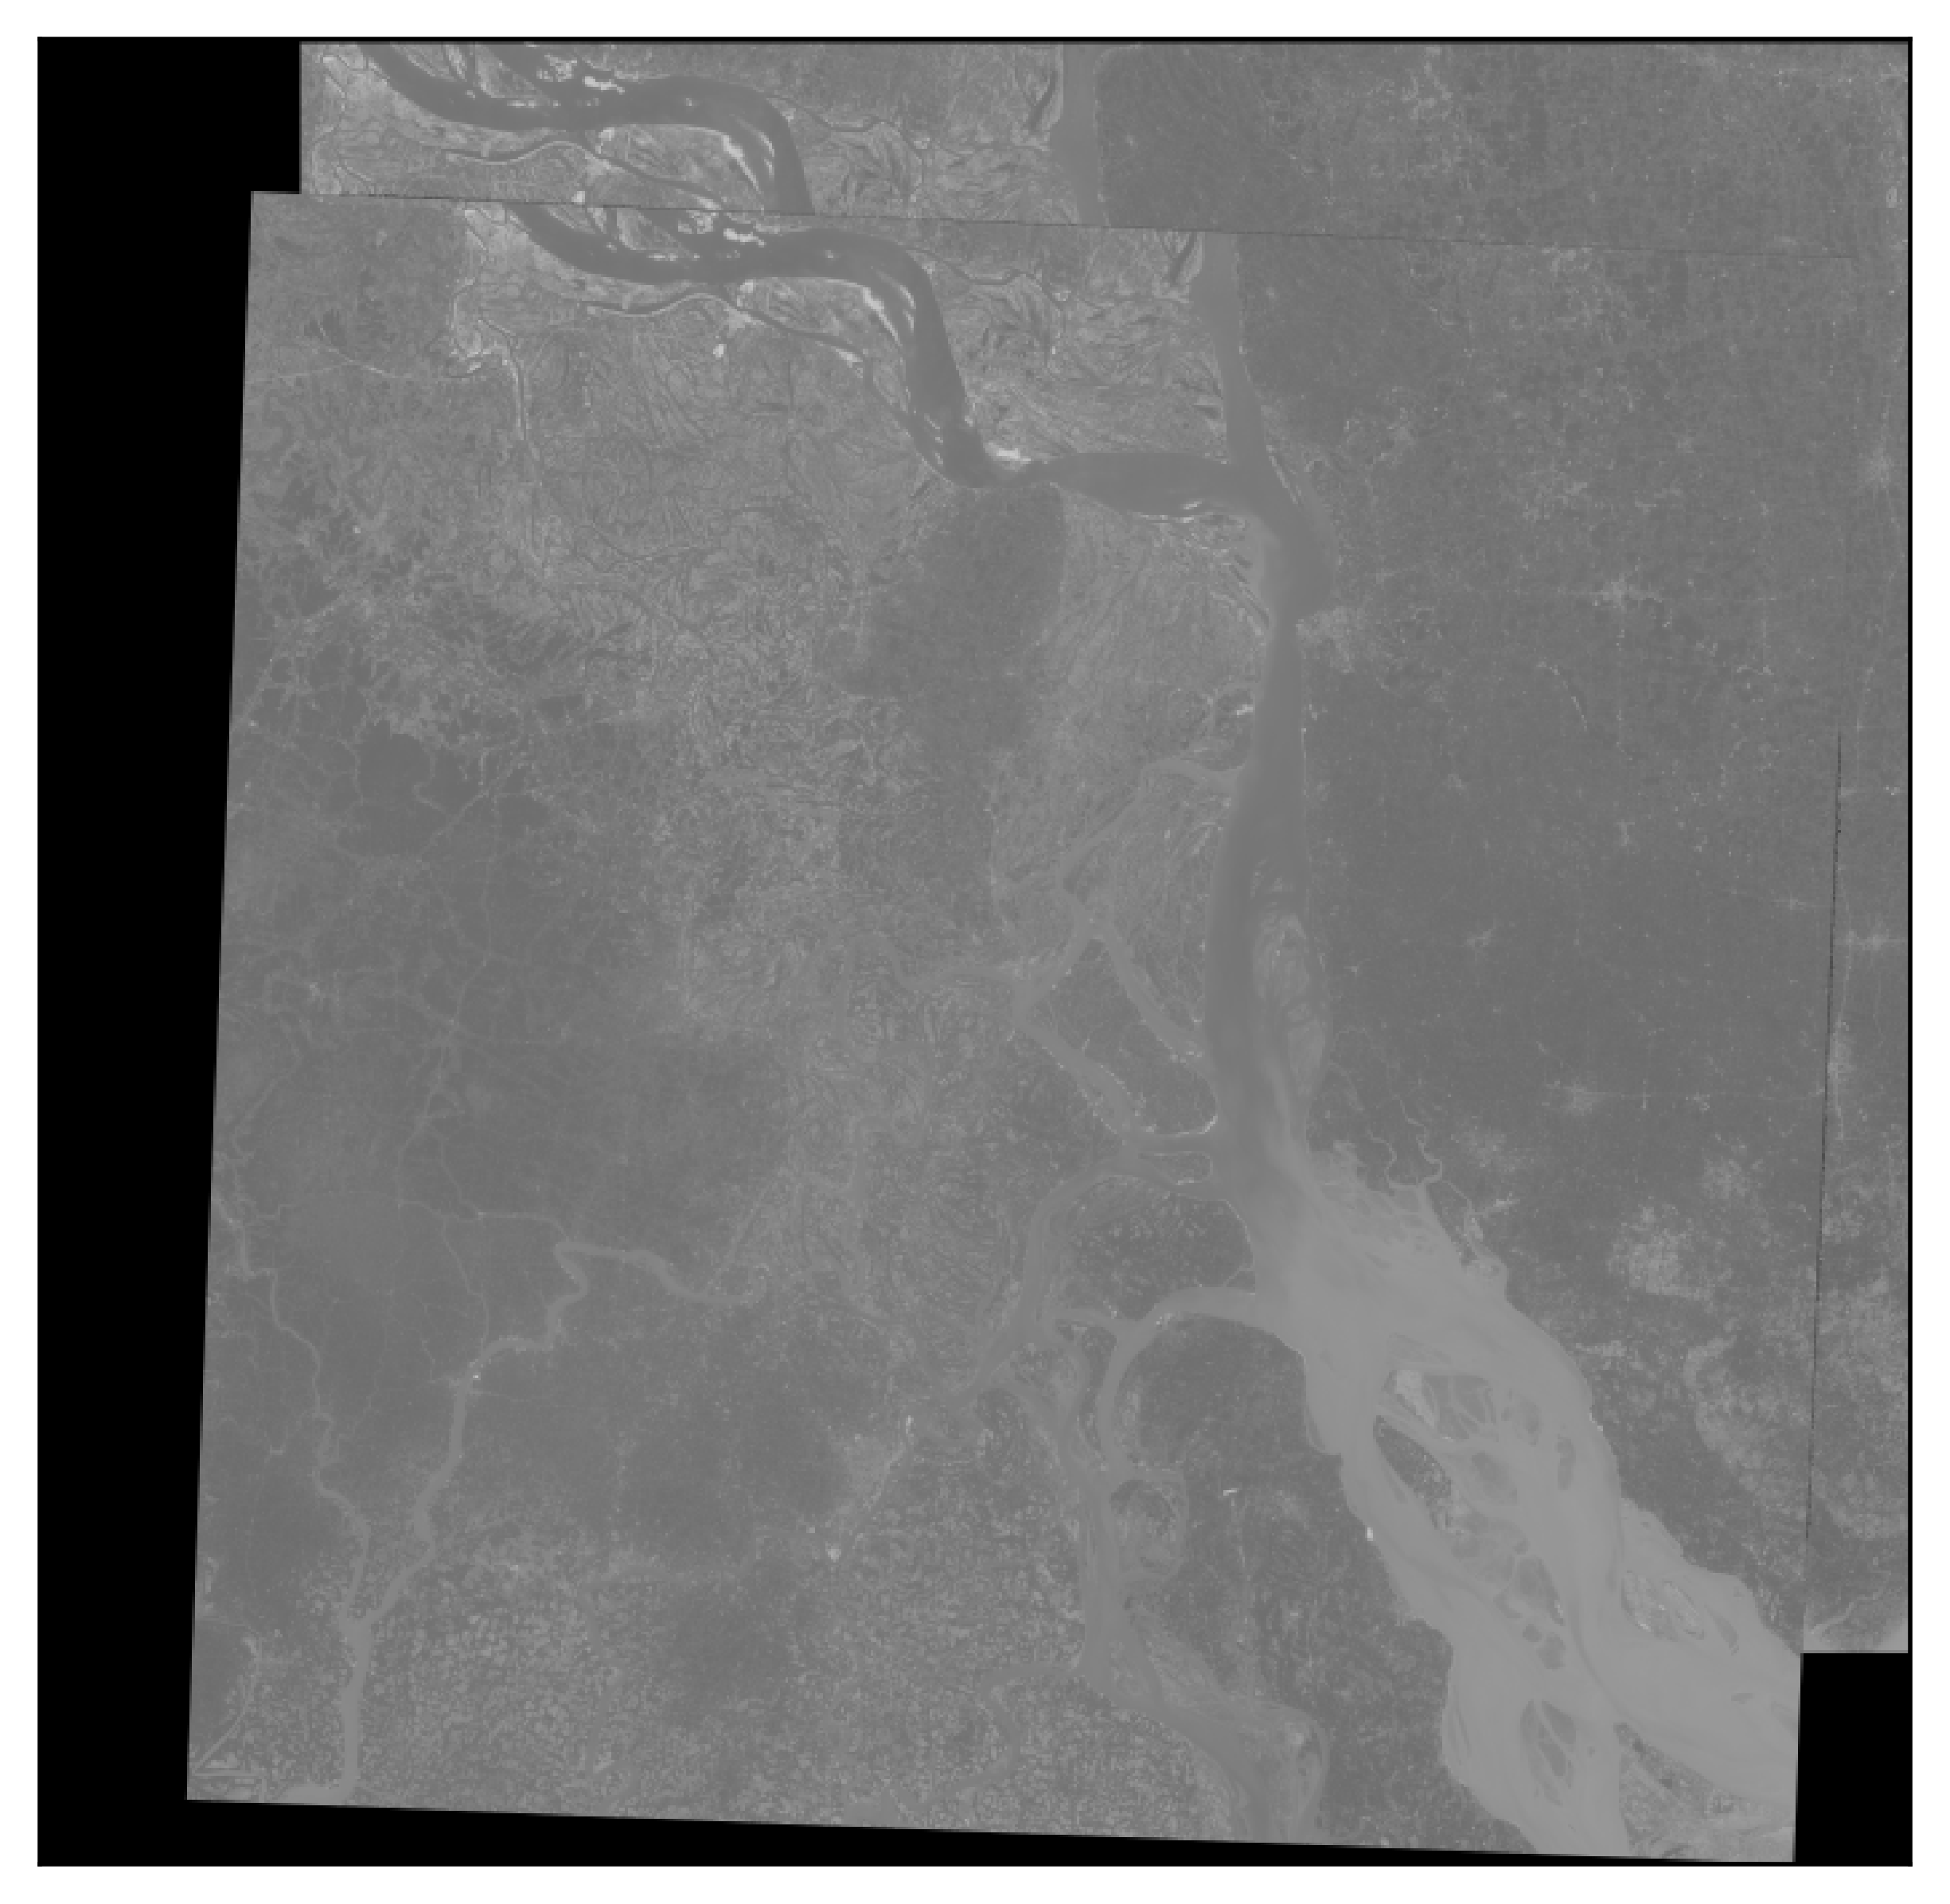

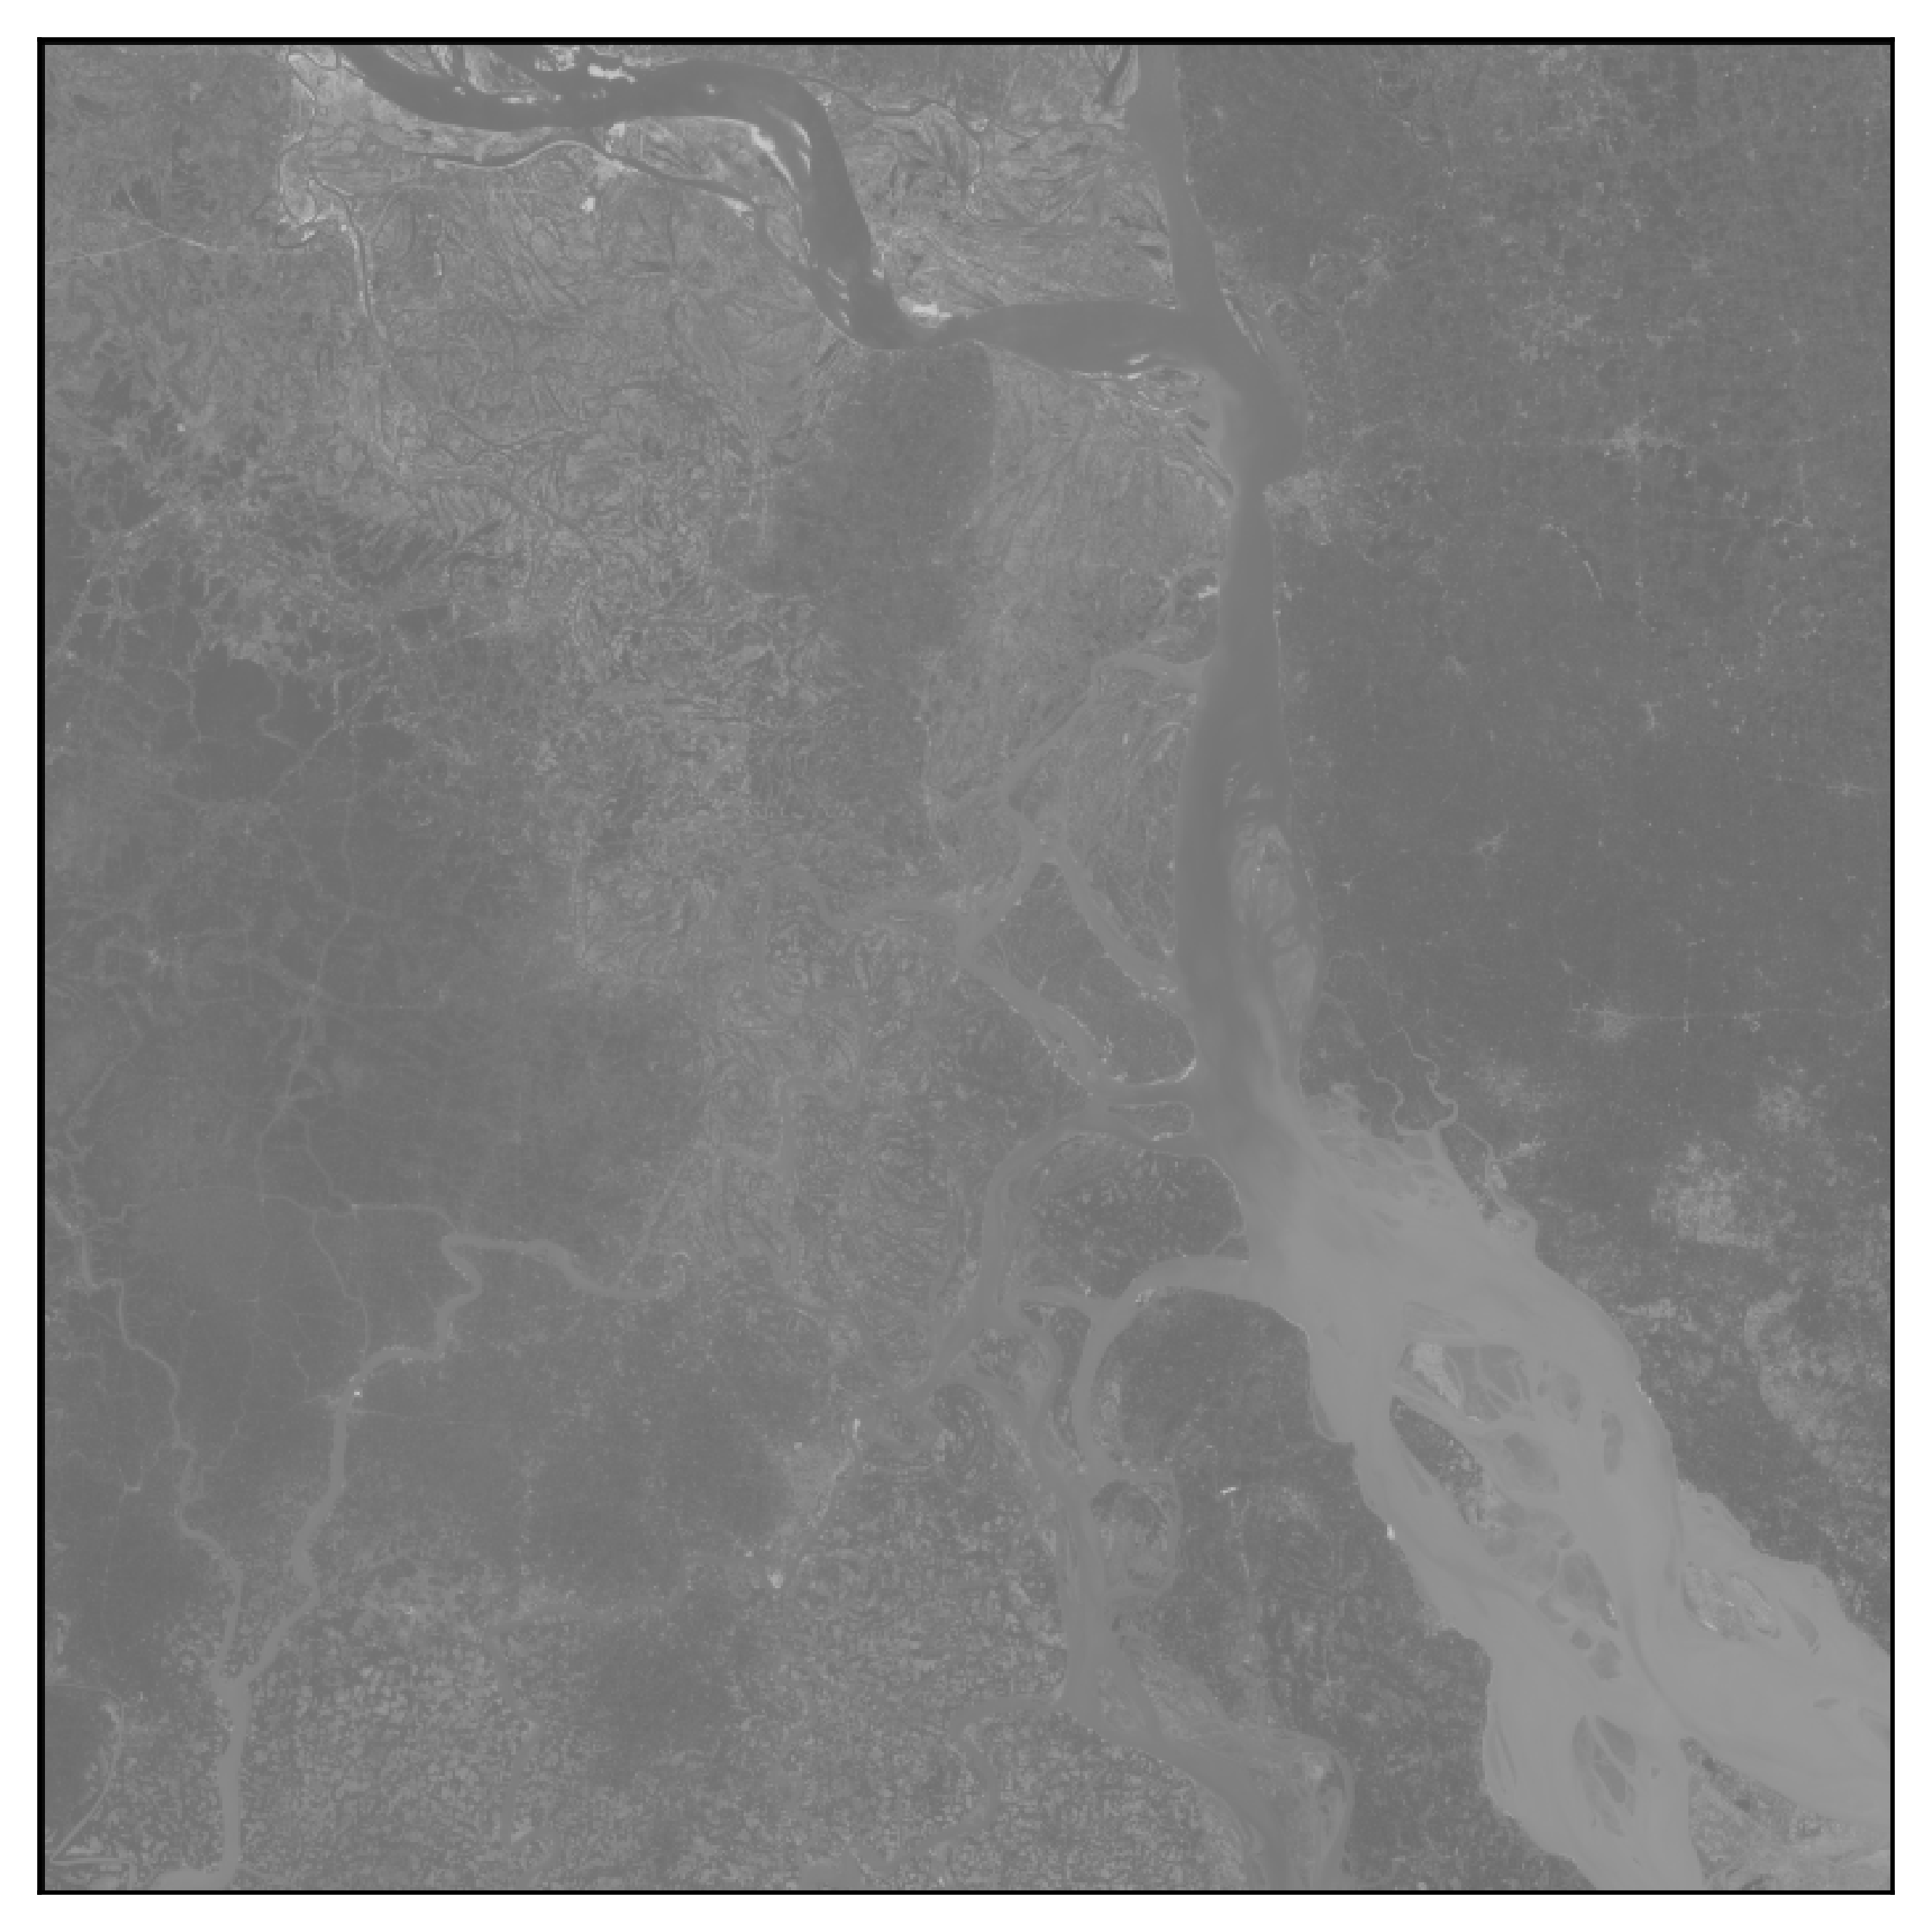

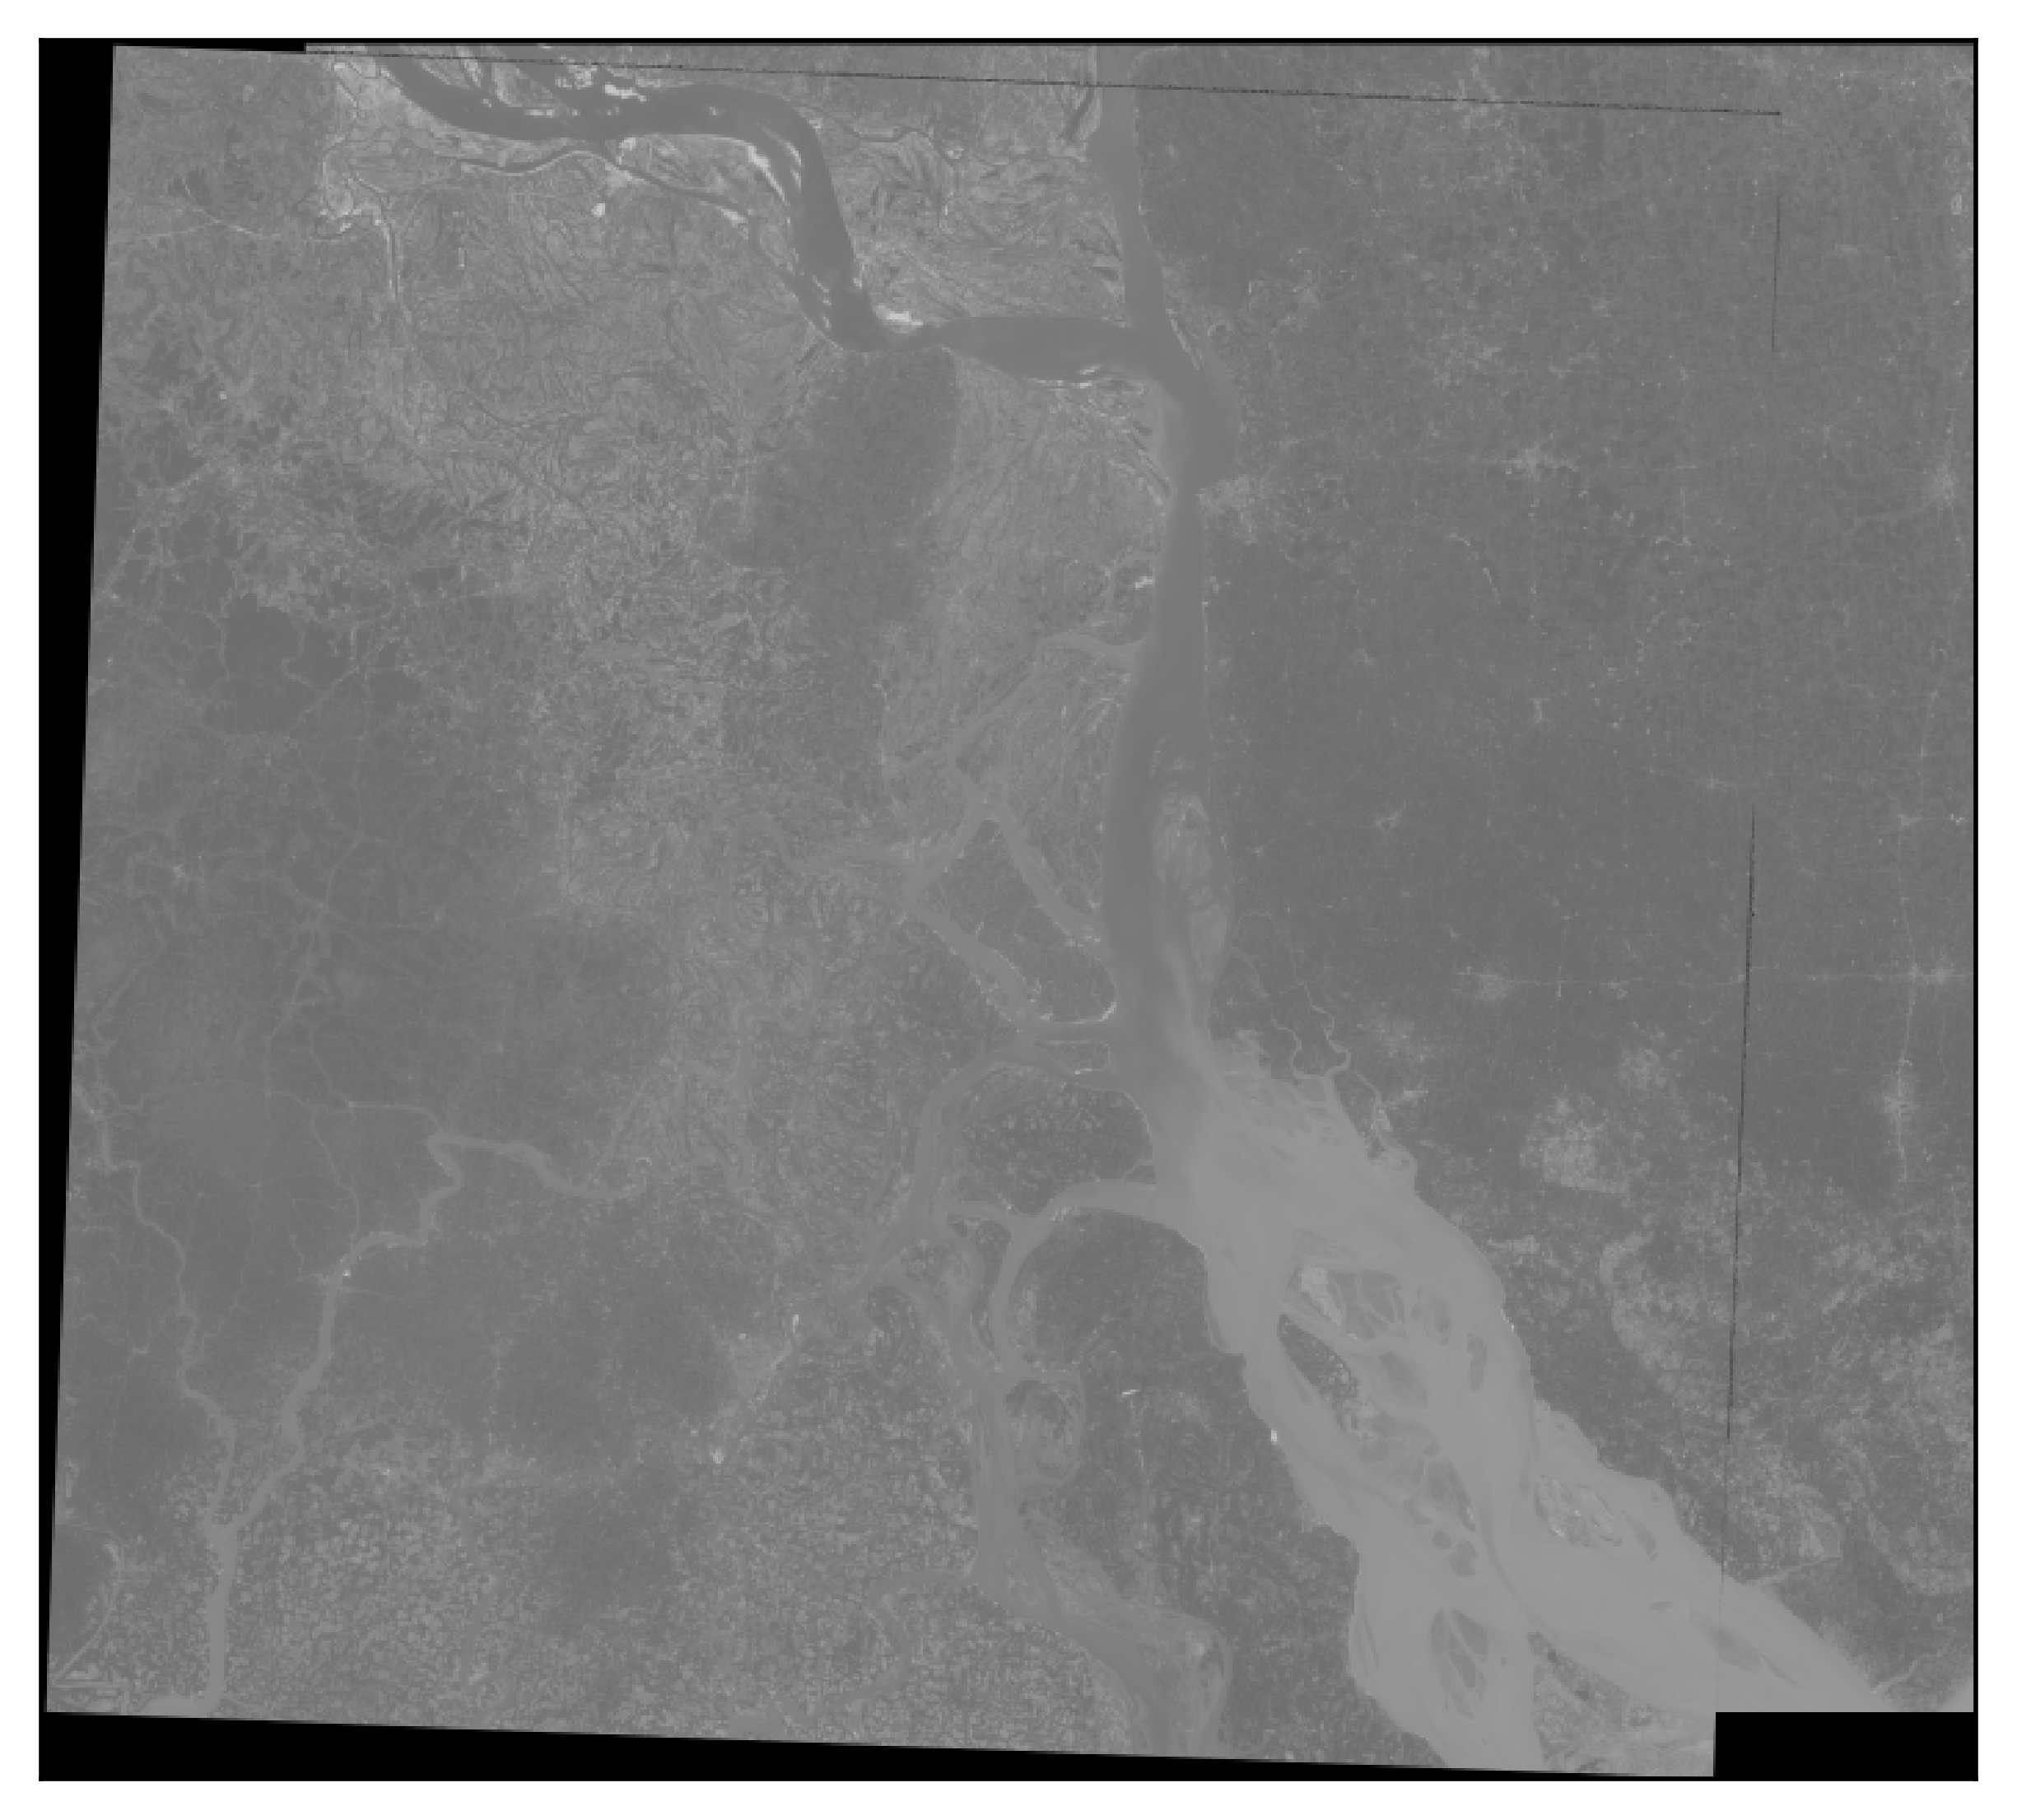

In [7]:
pad = 30 #pixels
# Save modified raster with a padding without changing the transform
add_padding(reg_path,'img\im2_45_pad%d_False.jp2'%pad,pad,pad,update_transform=False)
# Project the wrongly registered raster to the reference raster
project_and_merge('img\im2_45_pad%d_False.jp2'%pad,ref_path,'img\merge_pad%d_False.jp2'%pad)
project_boundingbox('img\im2_45_pad%d_False.jp2'%pad,ref_path,'img\warp_pad%d_False.jp2'%pad)

pad = 1000 #pixels
# Save modified raster with a padding without changing the transform
add_padding(reg_path,'img\im2_45_pad%d_False.jp2'%pad,pad,pad,update_transform=False)
# Project the wrongly registered raster to the reference raster
project_and_merge('img\im2_45_pad%d_False.jp2'%pad,ref_path,'img\merge_pad%d_False.jp2'%pad)
project_boundingbox('img\im2_45_pad%d_False.jp2'%pad,ref_path,'img\warp_pad%d_False.jp2'%pad)

display('img\im2_45_pad1000_False.jp2','Registered image with a padding of 1000 px',width=700)
display('img\merge_pad1000_False.jp2','Registered image projected with a wrong georeferencing',width=700)

display('img\im2_45_pad30_False.jp2','Registered image with a padding of 1000 px',width=700)
display('img\merge_pad30_False.jp2','Registered image projected with a wrong georeferencing',width=700)

add padding (30px, 1000px) and modifying the transform

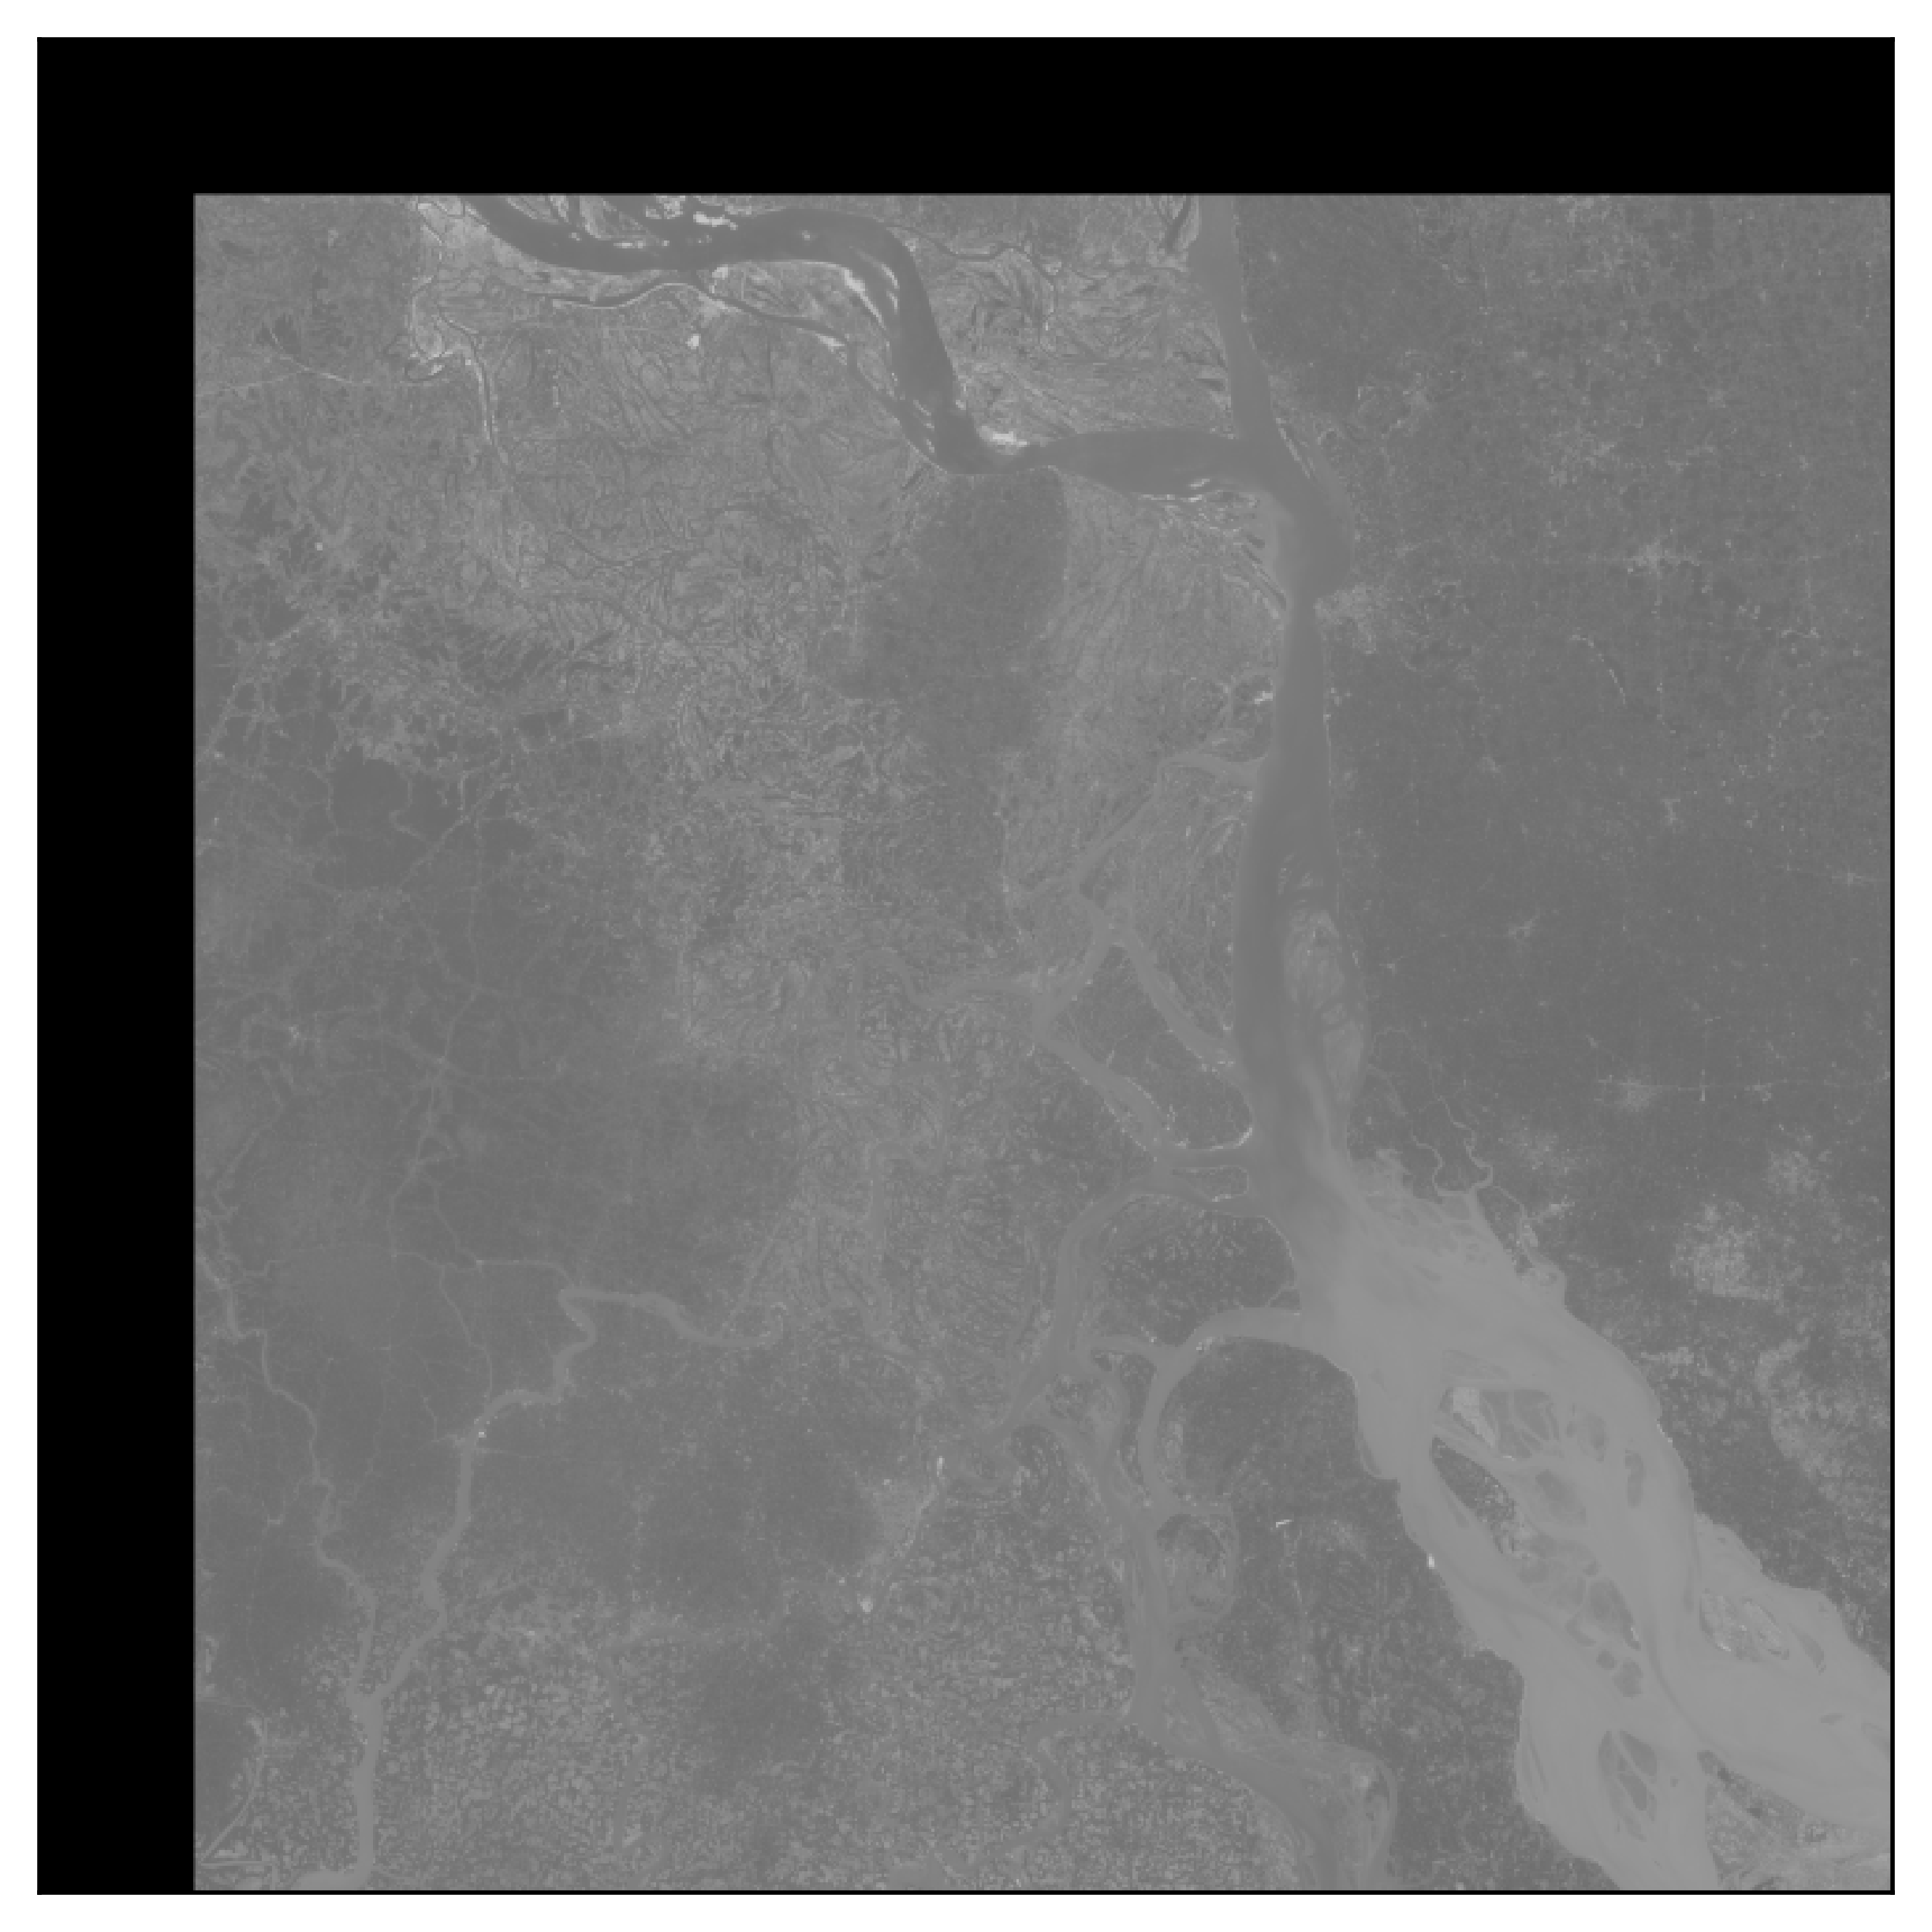

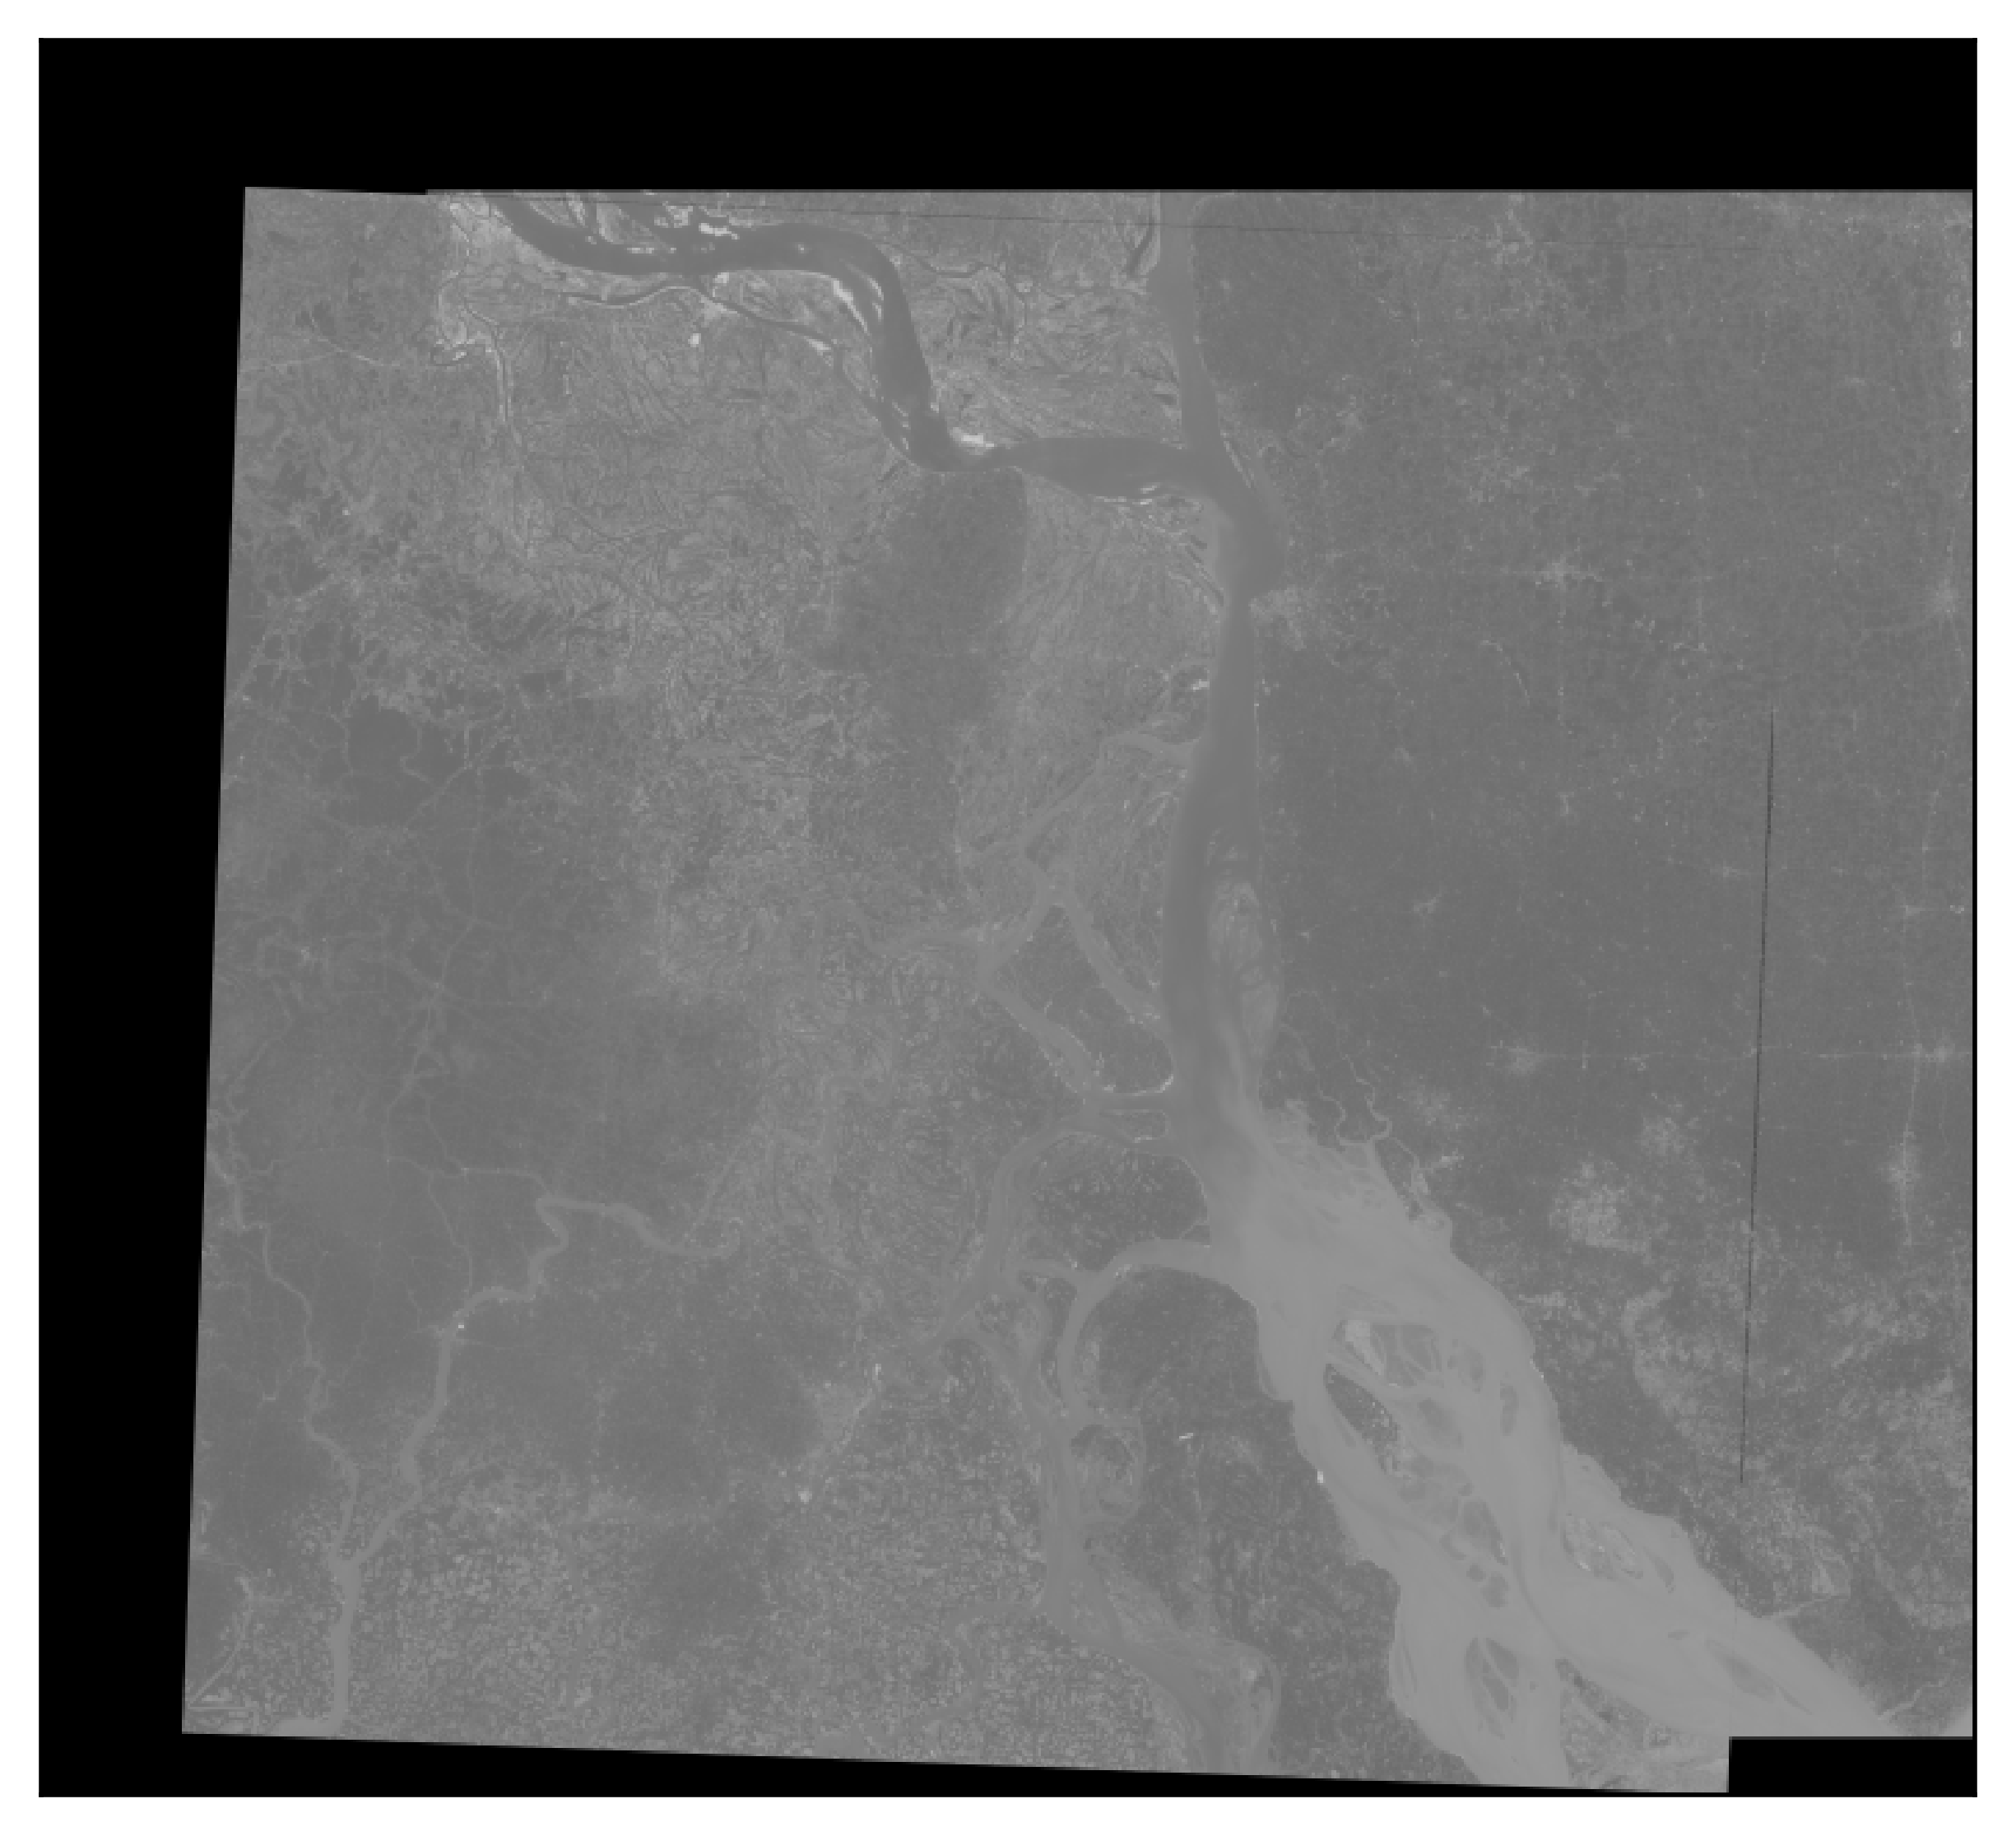

In [8]:
pad = 30 #pixels
# Save modified raster with a padding without changing the transform
add_padding(reg_path,'img\im2_45_pad%d_True.jp2'%pad,pad,pad,update_transform=True)
# Project the wrongly registered raster to the reference raster
project_and_merge('img\im2_45_pad%d_True.jp2'%pad,ref_path,'img\merge_pad%d_True.jp2'%pad)
project_boundingbox('img\im2_45_pad%d_True.jp2'%pad,ref_path,'img\warp_pad%d_True.jp2'%pad)

pad = 1000 #pixels
# Save modified raster with a padding without changing the transform
add_padding(reg_path,'img\im2_45_pad%d_True.jp2'%pad,pad,pad,update_transform=True)
# Project the wrongly registered raster to the reference raster
project_and_merge('img\im2_45_pad%d_True.jp2'%pad,ref_path,'img\merge_pad%d_True.jp2'%pad)
project_boundingbox('img\im2_45_pad%d_True.jp2'%pad,ref_path,'img\warp_pad%d_True.jp2'%pad)

display('img\im2_45_pad1000_True.jp2','Registered image with a padding of 1000 px',width=700)
display('img\merge_pad1000_True.jp2','Registered image projected with a right georeferencing',width=700)